# Future Time Perspective

## Group: Sara Bonati, Rahaf Gharzaddien, Franziska Usée

## Initialization

Specify Python modules to use

In [ ]:
## general utility imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from google.colab import files

# factor analysis/statistical modules
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy as sp
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
!pip install pingouin
import pingouin as pg
from sklearn.preprocessing import StandardScaler

# enable better figure layout
%config InlineBackend.figure_format= "retina"

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 40 kB 4.1 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40395 sha256=1cede8cca6cc539900d1388f978881842cde81d3863e209be77e056059b74ba6
  Stored in directory: /root/.cache/pip/wheels/8d/9e/4c/fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer
     |████████████████████████████████| 206 kB 30.1 MB/s 
     |████████████████████████████████| 28.5 MB 40 kB/s 
     |████████████████████████████████| 9.8 MB 52.9 MB/s 
     |████████████████████████████████| 233 kB 58.2 MB/s 
  Created wheel for pingouin: filename=pingouin-0.4.0-py3-none-any.whl size=206904 sha256=5cc107a376e77c492e872473ca4472c0c86b75b7c36e154c6f425a43c0788a92
  Stored in directory: /root/.cache/pip/wheels/8a/9d/c4/11677c2c4d5c0df9d1d4aa61528d868bb96e13b898e3f51c95
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=c9f7862eb3e40eca57c876bf1ef5ea91f3508a50ccabfba

In [ ]:
#!python --version

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Data import

In [ ]:
# import data as DataFrame object
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/soep_is_behav_econ_seminar_numval.csv")

FileNotFoundError: ignored

## Data exploration

In [ ]:
# view first five rows
df.head()

,cid,hid,pid,syear,sex,gebjahr,plh0197,plh0198,plh0199,plh0200,plh0201,plh0202,plh0206,plh0212,plh0213,plh0214,plh0215,plh0216,plh0217,plh0218,plh0219,plh0220,plh0221,plh0222,plh0223,plh0224,plh0225,plh0226,plh0255,plh0245,plh0246,plh0247,plh0248,plh0249,plh0250,plh0251,plh0252,plh0171,plh0172,plh0173,...,perineq04,perineq05,perineq06,perineq08,perineq09,perineq10,perineq11,perineq12,im_donat,donat_01,donat_a1,donat_a3,donat_a3b,donat_a3c,donat_a2,donat_a4,donat_a4b,donat_a4c,donat_b1,donat_b3,donat_b3b,donat_b3c,donat_b2,donat_b4,donat_b4b,donat_b4c,im_ivd,ivd03_1,ivd03_2,ivd03_3,ivd03_4,ivd03_5,ivd03_6,ivd03_7,ivd03_8,ivd03_9,ivd03_10,ivd03_11,im_bmas_onl,bmas_onl_f4
0,200093,200093,2000901,1998,1,1954,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,8,-5,8,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
1,200093,200093,2000901,1999,1,1954,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,6,-5,6,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
2,200093,200093,2000901,2000,1,1954,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,7,-5,-1,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
3,200093,200093,2000901,2001,1,1954,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,10,-5,10,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
4,200093,200093,2000901,2002,1,1954,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,5,-5,8,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5


## List of available variables in the initial dataframe

### Identification variables:

cid: Original household number (case ID) \
hid: Current wave household number \
pid: Person ID \
syear: Survey year \

### Demographic variables:

sex: Gender \
gebjahr: Year of birth \
pld0131: Marital status \
plb0022: Employment status \
hlc0005: Household net income \
bula: federal state \
pgbilzt: Amount of education or training (in years) \
pgemplst: Employment status \
hekg: How many of 100 people would have a higher net household income \

### Satisfaction:

plh0171: Satisfaction with Health \
plh0172: Satisfaction with Sleep \
plh0173: Satisfaction with Work \
plh0174: Satisfaction with Housework \
plh0175: Satisfaction with Household Income \
plh0161: Satisfaction with Personal Income \
plh0177: Satisfaction with Dwelling \
plh0178: Satisfaction with Amount of Leisure Time \
plh0179: Satisfaction with Child Care \
plh0180: Satisfaction with Family Life \

plh0182: Current life satisfaction \
zufz: How many of 100 people would have a higher life satisfaction \


### Personality (Big-5):

plh0212: Thorough worker \
plh0213: Am communicative \
plh0214: Am sometimes too coarse with others \
plh0215: Am original \
plh0216: Worry a lot \
plh0217: Able to forgive \
plh0218: Tend to be lazy \
plh0219: Am sociable \
plh0220: Value artistic experiences \
plh0221: Somewhat nervous \
plh0222: Carry out tasks efficiently \
plh0223: Reserved \
plh0224: Friendly with others \
plh0225: Have lively imagination \
plh0226: Deal well with stress \
plh0255: Inquisitive \


### Personality (Locus of control):

plh0245: My life course depends on me \
plh0246: What you achieve depends on luck \
plh0247: Others make the crucial decisions in my life \
plh0248: Success takes hard work \
plh0249: Doubt my abilities when problems arise \
plh0250: Possibilities are defined by social conditions \
plh0251: Abilities are more important than effort \
plh0252: Little control over my life

### Health: 

ple0008: Current health \
ple0026: Pressed for time last 4 weeks \
ple0027: Run-down, melancholy last 4 weeks \
ple0028: Weel-balanced last 4 weeks \
ple0029: Used energy last 4 weeks \
ple0030: Strong physical pain last for weeks \
ple0031: Limitations due to physical problems \
ple0032: Limitations due to physical problems \
ple0033: Achieved less due to mental problems \
ple0034: Less careful due to emotional problems \
ple0035: Limited socially due to health \
ple0072: Number of visits to doctor \
ple0073: No visits to doctor \
ple0053: Hospital stays previous year \
ple0046: No days off work sick previous year \
ple0044: Number of days off work sick previous year \
gesz: How many of 100 people would be in better health \

#### Sleep

pli0059: Hours of sleep, normal workday \
pli0060: Hours of sleep, weekend \

#### Depression

ple0019: Diagnosis depressive disorder ever (ple0019y2: last two years) \

In [ ]:
# get number of rows, columns
df.shape

(31060, 348)

In [ ]:
# get dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31060 entries, 0 to 31059
Columns: 348 entries, cid to bmas_onl_f4
dtypes: float64(12), int64(336)
memory usage: 82.5 MB


## Recoding of missing and not applicable values + column/variable selection based on % of missing values

In this section we recode special values for item responses (specifically -1,-2,-3 and -5) to be None values. After this first recoding has been done we select a subset of columns/variables of interest (see the report for more information on variable selection) . Finally, we count the number of None value for each of the columns of interest and retain only those columns who have at least 90% of non-null values. A few variables are also dropped based on their content (se the report for more details). The final recoded and cleaned dataframe is downloaded as a csv file in the last cell of this section, to be used later.

In [ ]:
# recode no answer (-1) to None values
df[df.iloc[:,:]==-1] = None
# recode does not apply here (-2) to None values
df[df.iloc[:,:]==-2] = None
# record not included in this version of the questionnaire (-5) to None values
df[df.iloc[:,:]==-5] = None
# record answer improbable (-3) to None values
df[df.iloc[:,:]==-3] = None

In [ ]:
# add variable for age (current year - birth year)
df["age"] = 2017 - df["gebjahr"]

In [ ]:
# definition of list of items of interest
items = ["cid", "hid", "syear", "pid", "age", "sex", "pld0131", "plb0022" , "hlc0005", "bula", "pgbilzt", "pgemplst", "hekg", "plh0171", "plh0172", "plh0173", "plh0174", "plh0175", "plh0161", "plh0177", "plh0178", "plh0179", "plh0180", "plh0182","zufz", "plh0212", "plh0213", "plh0214", "plh0215", "plh0216", "plh0217", "plh0218", "plh0219", "plh0220", "plh0221", "plh0222", "plh0223", "plh0224", "plh0225", "plh0226", "plh0255", "plh0245", "plh0246","plh0247", "plh0248", "plh0249", "plh0250", "plh0251", "plh0252", "ple0008", "ple0026", "ple0027", "ple0028", "ple0029", "ple0030", "ple0031", "ple0032", "ple0033", "ple0034", "ple0035", "ple0072", "ple0073", "ple0053", "ple0046", "ple0044",  "gesz", "pli0059", "pli0060","ple0019", "ple0019y2", "sim1201", "sim1202", "sim1203", "sim1204", "emoreg1", "emoreg2", "emoreg3", "emoreg4", "spo1", "spo4mia", "spo91", "prpflk", "prpernaer", "schl4m", "schl5", "pkr23a", "prpalkk1", "zp1", "zp2", "zp3", "zp4"]

In [ ]:
# print number of items
len(items)

91

In [ ]:
# selection of items of interest: df_use
df_use = df[items]

In [ ]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31060 entries, 0 to 31059
Data columns (total 91 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cid        31060 non-null  int64  
 1   hid        31060 non-null  int64  
 2   syear      31060 non-null  int64  
 3   pid        31060 non-null  int64  
 4   age        31060 non-null  int64  
 5   sex        31060 non-null  int64  
 6   pld0131    31023 non-null  float64
 7   plb0022    31059 non-null  float64
 8   hlc0005    29012 non-null  float64
 9   bula       31060 non-null  int64  
 10  pgbilzt    30108 non-null  float64
 11  pgemplst   31059 non-null  float64
 12  hekg       711 non-null    float64
 13  plh0171    31042 non-null  float64
 14  plh0172    27178 non-null  float64
 15  plh0173    17889 non-null  float64
 16  plh0174    16383 non-null  float64
 17  plh0175    30788 non-null  float64
 18  plh0161    25295 non-null  float64
 19  plh0177    31016 non-null  float64
 20  plh017

In [ ]:
# print number of rows 
len(df_use)

31060

In [ ]:
# view first five rows
df_use.head()

,cid,hid,syear,pid,age,sex,pld0131,plb0022,hlc0005,bula,pgbilzt,pgemplst,hekg,plh0171,plh0172,plh0173,plh0174,plh0175,plh0161,plh0177,plh0178,plh0179,plh0180,plh0182,zufz,plh0212,plh0213,plh0214,plh0215,plh0216,plh0217,plh0218,plh0219,plh0220,plh0221,plh0222,plh0223,plh0224,plh0225,plh0226,...,ple0027,ple0028,ple0029,ple0030,ple0031,ple0032,ple0033,ple0034,ple0035,ple0072,ple0073,ple0053,ple0046,ple0044,gesz,pli0059,pli0060,ple0019,ple0019y2,sim1201,sim1202,sim1203,sim1204,emoreg1,emoreg2,emoreg3,emoreg4,spo1,spo4mia,spo91,prpflk,prpernaer,schl4m,schl5,pkr23a,prpalkk1,zp1,zp2,zp3,zp4
0,200093,200093,1998,2000901,63,1,1.0,1.0,NaN,1,12.0,1.0,NaN,8.0,NaN,8.0,4.0,4.0,NaN,8.0,6.0,1.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200093,200093,1999,2000901,63,1,1.0,1.0,NaN,1,12.0,1.0,NaN,6.0,NaN,6.0,7.0,4.0,NaN,10.0,3.0,1.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200093,200093,2000,2000901,63,1,1.0,1.0,6200.0,1,10.0,1.0,NaN,7.0,NaN,NaN,6.0,9.0,NaN,10.0,7.0,6.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200093,200093,2001,2000901,63,1,1.0,1.0,6000.0,1,10.0,1.0,NaN,10.0,NaN,10.0,10.0,10.0,NaN,10.0,10.0,5.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200093,200093,2002,2000901,63,1,1.0,1.0,NaN,1,10.0,1.0,NaN,5.0,NaN,8.0,9.0,5.0,NaN,10.0,5.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,2.0,5.0,4.0,4.0,4.0,4.0,4.0,NaN,1.0,2.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# descriptive statistics
df_use.describe()

,cid,hid,syear,pid,age,sex,pld0131,plb0022,hlc0005,bula,pgbilzt,pgemplst,hekg,plh0171,plh0172,plh0173,plh0174,plh0175,plh0161,plh0177,plh0178,plh0179,plh0180,plh0182,zufz,plh0212,plh0213,plh0214,plh0215,plh0216,plh0217,plh0218,plh0219,plh0220,plh0221,plh0222,plh0223,plh0224,plh0225,plh0226,...,ple0027,ple0028,ple0029,ple0030,ple0031,ple0032,ple0033,ple0034,ple0035,ple0072,ple0073,ple0053,ple0046,ple0044,gesz,pli0059,pli0060,ple0019,ple0019y2,sim1201,sim1202,sim1203,sim1204,emoreg1,emoreg2,emoreg3,emoreg4,spo1,spo4mia,spo91,prpflk,prpernaer,schl4m,schl5,pkr23a,prpalkk1,zp1,zp2,zp3,zp4
count,3.106000e+04,3.106000e+04,31060.000000,3.106000e+04,31060.000000,31060.000000,31023.000000,31059.000000,29012.000000,31060.000000,30108.000000,31059.000000,711.000000,31042.000000,27178.000000,17889.000000,16383.000000,30788.000000,25295.000000,31016.000000,30998.000000,2361.000000,27743.000000,31043.000000,710.000000,12717.000000,12745.000000,12737.000000,12723.000000,12744.000000,12737.000000,12733.000000,12737.000000,12661.000000,12744.000000,12725.000000,12740.000000,12741.000000,12730.000000,12725.000000,...,17094.000000,17080.000000,17071.000000,17094.000000,17042.000000,17037.000000,17040.000000,17030.000000,17049.000000,22083.000000,8952.0,31031.000000,11128.000000,7721.0,705.000000,26457.000000,26443.000000,417.0,1034.0,1949.000000,1954.000000,1957.000000,1949.000000,1350.000000,1389.000000,1359.000000,1388.000000,3927.000000,2332.000000,2373.000000,2566.000000,877.000000,691.000000,696.000000,42.0,2565.000000,913.000000,915.000000,910.000000,911.000000
mean,1.986783e+06,1.961840e+06,2013.127946,1.982406e+07,55.053381,1.536832,2.432324,4.797128,2992.951951,7.441887,12.320579,3.101774,44.898734,6.776593,6.726764,7.203142,6.927181,6.788976,6.361890,8.012671,7.284438,6.808979,8.070721,7.454950,31.857746,6.126995,5.571518,3.078904,4.773402,4.424592,5.488812,2.416084,5.182618,4.431719,3.637947,5.784754,4.096154,5.850483,4.936999,4.575953,...,3.767053,2.611300,2.936442,3.926407,3.961037,4.033457,4.423533,4.515913,4.453164,3.390527,1.0,1.858045,16.589324,1.0,35.792908,6.835355,7.603335,1.0,1.0,1.611596,1.409417,1.580991,1.394561,4.524444,4.224622,4.491538,4.257205,3.968678,77.180961,5.133165,2.095479,2.665906,6.458755,2.091954,1.0,4.004288,3.268346,3.401093,2.023077,2.841932
std,1.767722e+06,1.760464e+06,4.943024,1.766783e+07,17.971589,0.498650,1.809951,3.691814,1752.512310,3.819767,2.677671,1.834544,24.133803,2.223750,2.346694,2.100661,1.981697,2.314323,2.513514,1.868824,2.174703,2.774189,1.917305,1.710978,21.283718,1.003529,1.373085,1.739959,1.449287,1.777057,1.348583,1.596257,1.471282,1.888107,1.731110,1.088848,1.636608,1.056496,1.556223,1.538918,...,0.983405,0.915686,0.939283,1.141009,1.156904,1.153436,0.913359,0.836270,0.915636,4.364900,0.0,0.349009,34.982530,0.0,24.887467,1.263913,1.485049,0.0,0.0,0.752470,0.661449,0.715163,0.666591,1.749021,1.770703,1.665657,1.801861,2.658963,56.749556,1.984119,1.107762,0.736453,12.625232,0.719827,0.0,1.492957,1.256237,1.224208,1.257110,1.391986
min,2.000930e+05,1.153800e+05,1998.000000,1.153802e+06,15.000000,1.000000,1.000000,1.000000,0.000000,1.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.0,0.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.543790e+05,8.550900e+05,2011.000000,8.546904e+06,42.000000,1.000000,1.000000,1.000000,1780.000000,5.000000,10.500000,1.000000,25.000000,5.000000,5.000000,6.000000,6.000000,5.000000,5.000000,7.000000,6.000000,5.000000,7.000000,7.000000,15.000000,6.

In [ ]:
# drop missing values on FTP items
df_use = df_use.dropna(subset=["zp1", "zp2", "zp3", "zp4"])

In [ ]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 14803 to 26743
Data columns (total 91 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cid        902 non-null    int64  
 1   hid        902 non-null    int64  
 2   syear      902 non-null    int64  
 3   pid        902 non-null    int64  
 4   age        902 non-null    int64  
 5   sex        902 non-null    int64  
 6   pld0131    902 non-null    float64
 7   plb0022    902 non-null    float64
 8   hlc0005    858 non-null    float64
 9   bula       902 non-null    int64  
 10  pgbilzt    884 non-null    float64
 11  pgemplst   902 non-null    float64
 12  hekg       0 non-null      float64
 13  plh0171    902 non-null    float64
 14  plh0172    901 non-null    float64
 15  plh0173    513 non-null    float64
 16  plh0174    820 non-null    float64
 17  plh0175    897 non-null    float64
 18  plh0161    887 non-null    float64
 19  plh0177    902 non-null    float64
 20  plh0

In [ ]:
# print number of rows
len(df_use)

902

In [ ]:
missing = []                                                                     # list initialization

for col in list(df_use.columns):                                                 # for each column in dataframe
  if df_use[col].notnull().sum() == 0:                                           # if number of not-null values equals 0 (all values are missing)
    missing.append(col)                                                          # list expansion
    print(col)                                                                   # print column names


hekg
zufz
plh0245
plh0246
plh0247
plh0248
plh0249
plh0250
plh0251
plh0252
gesz
ple0019
sim1201
sim1202
sim1203
sim1204
emoreg1
emoreg2
emoreg3
emoreg4
prpflk
prpernaer
schl4m
schl5
pkr23a
prpalkk1


In [ ]:
for col in list(df_use.columns):
  if 0 < df_use[col].notnull().sum() <= 100:
    missing.append(col)
    print(col)

plh0179
ple0019y2


In [ ]:
for col in list(df_use.columns):
  if 100 < df_use[col].notnull().sum() <= 500:
    missing.append(col)
    print(col)

ple0073
ple0046
ple0044
spo1
spo4mia
spo91


In [ ]:
for col in list(df_use.columns):
  if 500 < df_use[col].notnull().sum() <= 811:
    missing.append(col)
    print(col)

plh0173
ple0072


In [ ]:
# print number of columns that are in missing list
len(missing)

36

In [ ]:
for col in list(df_use.columns):
  if 811 < df_use[col].notnull().sum() <= 900:
    print(col)

hlc0005
pgbilzt
plh0174
plh0175
plh0161
plh0178
plh0180
plh0220
plh0226
ple0031
ple0032
ple0033
ple0034
ple0035
pli0059
pli0060


In [ ]:
for col in list(df_use.columns):
  if df_use[col].notnull().sum() > 900:
    print(col)

cid
hid
syear
pid
age
sex
pld0131
plb0022
bula
pgemplst
plh0171
plh0172
plh0177
plh0182
plh0212
plh0213
plh0214
plh0215
plh0216
plh0217
plh0218
plh0219
plh0221
plh0222
plh0223
plh0224
plh0225
plh0255
ple0008
ple0026
ple0027
ple0028
ple0029
ple0030
ple0053
zp1
zp2
zp3
zp4


In [ ]:
# removal of columns with missing values > 800
df_use = df_use.drop(missing, axis = 1)

In [ ]:
# print number of rows, columns
df_use.shape

(902, 55)

In [ ]:
# drop NaN values
df_use = df_use.dropna()

In [ ]:
# print number of rows, columns
df_use.shape

(724, 55)

In [ ]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 14803 to 26743
Data columns (total 55 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cid       724 non-null    int64  
 1   hid       724 non-null    int64  
 2   syear     724 non-null    int64  
 3   pid       724 non-null    int64  
 4   age       724 non-null    int64  
 5   sex       724 non-null    int64  
 6   pld0131   724 non-null    float64
 7   plb0022   724 non-null    float64
 8   hlc0005   724 non-null    float64
 9   bula      724 non-null    int64  
 10  pgbilzt   724 non-null    float64
 11  pgemplst  724 non-null    float64
 12  plh0171   724 non-null    float64
 13  plh0172   724 non-null    float64
 14  plh0174   724 non-null    float64
 15  plh0175   724 non-null    float64
 16  plh0161   724 non-null    float64
 17  plh0177   724 non-null    float64
 18  plh0178   724 non-null    float64
 19  plh0180   724 non-null    float64
 20  plh0182   724 non-null    

In [ ]:
# print column names
df_use.columns

Index(['cid', 'hid', 'syear', 'pid', 'age', 'sex', 'pld0131', 'plb0022',
       'hlc0005', 'bula', 'pgbilzt', 'pgemplst', 'plh0171', 'plh0172',
       'plh0174', 'plh0175', 'plh0161', 'plh0177', 'plh0178', 'plh0180',
       'plh0182', 'plh0212', 'plh0213', 'plh0214', 'plh0215', 'plh0216',
       'plh0217', 'plh0218', 'plh0219', 'plh0220', 'plh0221', 'plh0222',
       'plh0223', 'plh0224', 'plh0225', 'plh0226', 'plh0255', 'ple0008',
       'ple0026', 'ple0027', 'ple0028', 'ple0029', 'ple0030', 'ple0031',
       'ple0032', 'ple0033', 'ple0034', 'ple0035', 'ple0053', 'pli0059',
       'pli0060', 'zp1', 'zp2', 'zp3', 'zp4'],
      dtype='object')

Drop further columns based on their content: hlc0005, bula, pgemplst, plh0174, plh0175, plh0161, plh0177, plh0178, plh0180, ple0032, ple0033, ple0034, pli0060

In [ ]:
drop_col = ["hid", "cid", "hlc0005", "bula", "pgemplst", "plh0174", "plh0175", "plh0161", "plh0177", "plh0178", "plh0180", "ple0032", "ple0033", "ple0034", "pli0060"]

In [ ]:
df_use.drop(drop_col,                                                            # list of columns to be dropped
            axis    = 1,                                                         # axis: columns 
            inplace = True)                                                      # do operation inplace

In [ ]:
# view number of rows, columns
df_use.shape

(724, 40)

In [ ]:
# get column names
df_use.columns

Index(['syear', 'pid', 'age', 'sex', 'pld0131', 'plb0022', 'pgbilzt',
       'plh0171', 'plh0172', 'plh0182', 'plh0212', 'plh0213', 'plh0214',
       'plh0215', 'plh0216', 'plh0217', 'plh0218', 'plh0219', 'plh0220',
       'plh0221', 'plh0222', 'plh0223', 'plh0224', 'plh0225', 'plh0226',
       'plh0255', 'ple0008', 'ple0026', 'ple0027', 'ple0028', 'ple0029',
       'ple0030', 'ple0031', 'ple0035', 'ple0053', 'pli0059', 'zp1', 'zp2',
       'zp3', 'zp4'],
      dtype='object')

In [ ]:
# export dataframe file to csv file
compression_opts = dict(method='zip',archive_name='data_final.csv')  
df_use.to_csv('data_final.zip',
              index=False,                       
              compression=compression_opts) 

# Final Data import

In this section we import the recoded and cleaned data to create a new "age" column to substitute the "gebjahr" column, perform exploratory data analysisand calculate descriptive statistics for each selected variable. Particular attention is given to the Future Time Perspective items: for these 4 items we also perform factor analysis and show a 2-factor FTP structure.

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/data_final.csv", index_col=[0])

Groups of variables

In [ ]:
# lists of variable groups
# (1) socio-demographic variables
demo_var  = ["sex", "gebjahr", "pld0131", "plb0022", "pgbilzt"]

# (2) satisfaction/well-being variables
satis_var = ["plh0171", "plh0172", "plh0182"]

# (3) personality variables
pers_var  = ["plh0212","plh0213", "plh0214", "plh0215","plh0216", "plh0217", 
             "plh0218", "plh0219",  "plh0220", "plh0221", "plh0222", "plh0223",
             "plh0224", "plh0225", "plh0226", "plh0255"]

# (4) health variables
health_var = ["ple0008", "ple0026",  "ple0027",  "ple0028",  "ple0029",  
              "ple0030", "ple0031", "ple0035", "ple0053", "pli0059", ]

# (5) FTP items
ftp_var    = ["zp1", "zp2", "zp3","zp4"]

In [ ]:
df["age"] = 2017 - df["gebjahr"]

In [ ]:
# age distribution
df["age"].describe()

count    724.000000
mean      53.001381
std       17.218432
min       17.000000
25%       39.000000
50%       54.000000
75%       66.250000
max       89.000000
Name: age, dtype: float64

In [ ]:
# gender distribution
df.sex.value_counts()

2    403
1    321
Name: sex, dtype: int64

In [ ]:
# years of education
df.pgbilzt.describe() 

count    724.000000
mean      12.210635
std        2.483452
min        7.000000
25%       10.500000
50%       11.500000
75%       13.500000
max       18.000000
Name: pgbilzt, dtype: float64

In [ ]:
# employment status
df.plb0022.value_counts()           

9.0    314
1.0    251
2.0    103
4.0     40
3.0     13
5.0      2
7.0      1
Name: plb0022, dtype: int64

In [ ]:
# marital status 
df.pld0131.value_counts()      

1.0    369
3.0    176
4.0    105
5.0     60
2.0     13
6.0      1
Name: pld0131, dtype: int64

In [ ]:
ftp_cols_labels = ['"Many opportunities await me in the future"',
                   '"My future is filled with possibilities"',
                   '"I have the sense that time is running out"',
                   '"As I get older, I begin to experience that time is limited"']

## Exploration of FTP items and Factor Analysis

In [ ]:
df_FA = df[ftp_var]

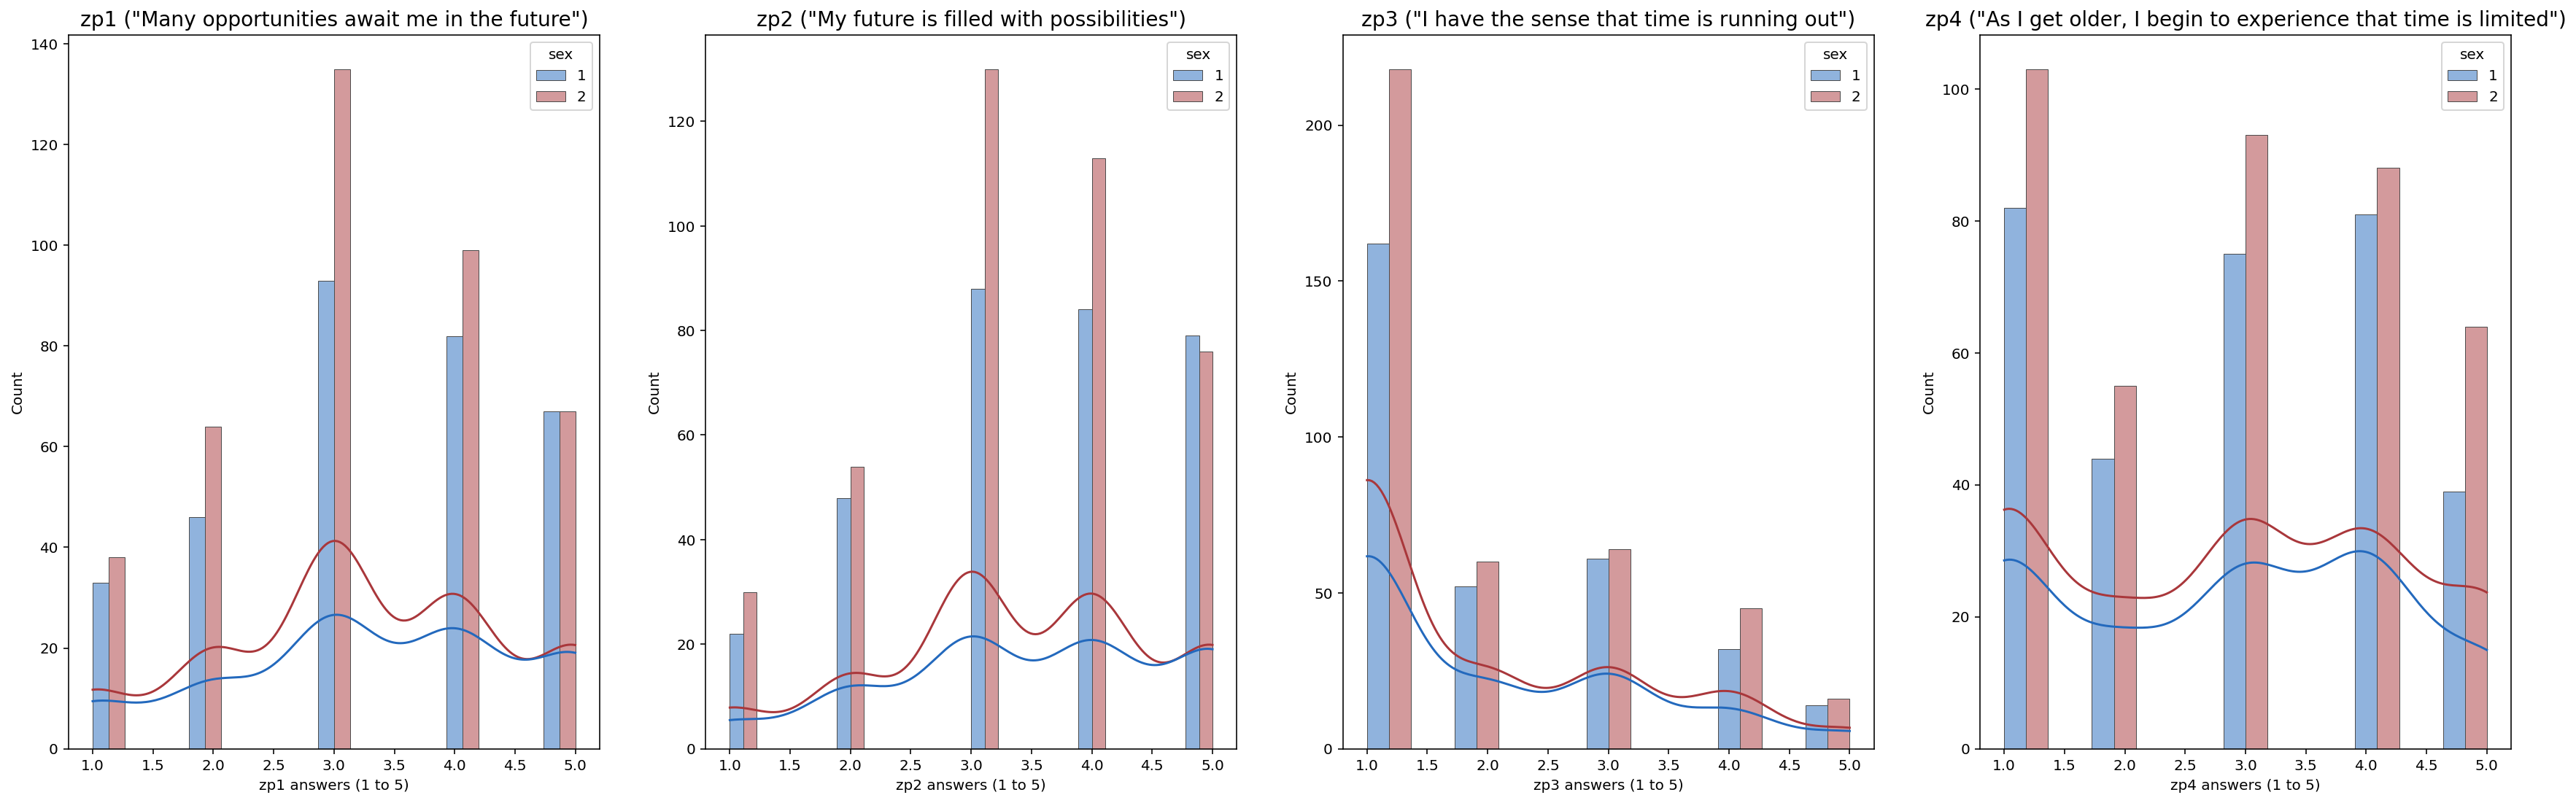

In [ ]:
fig = plt.figure(figsize=(30,9))
gs = gridspec.GridSpec(1,4)
ax ={}

#fig.suptitle("Future Time Perspective Items",fontsize=18)
for c in range(len(ftp_var)):                                                    # survey year
    ax[0]=fig.add_subplot(gs[0,c])
    ax[0].set_title(ftp_var[c]+' ('+ftp_cols_labels[c]+')',fontsize=14)
    sns.histplot(df[df['syear']==2017],
                x         = ftp_var[c],
                hue       = "sex", 
                kde       = True,
                multiple  = "dodge",
                edgecolor = ".3",
                palette   = "vlag",
                linewidth = .5,
                ax        = ax[0])
    ax[0].set_xlabel(ftp_var[c]+' answers (1 to 5)')
    
plt.show()

fig.savefig("FTP_items_EDA.pdf", dpi = 300, format = "pdf")
#files.download("FTP_items_EDA.pdf") 

In [ ]:
df_FA.zp1.value_counts()

3.0    228
4.0    181
5.0    134
2.0    110
1.0     71
Name: zp1, dtype: int64

In [ ]:
df_FA.zp2.value_counts()

3.0    218
4.0    197
5.0    155
2.0    102
1.0     52
Name: zp2, dtype: int64

In [ ]:
df_FA.zp3.value_counts()

1.0    380
3.0    125
2.0    112
4.0     77
5.0     30
Name: zp3, dtype: int64

In [ ]:
df_FA.zp4.value_counts()

1.0    185
4.0    169
3.0    168
5.0    103
2.0     99
Name: zp4, dtype: int64

In [ ]:
fa = FactorAnalyzer()                                                            # initialization of FactorAnalyzer
fa.fit(df_FA)                                                                    # fit FactorAnalyzer to data

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation='promax',
               rotation_kwargs={}, use_smc=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

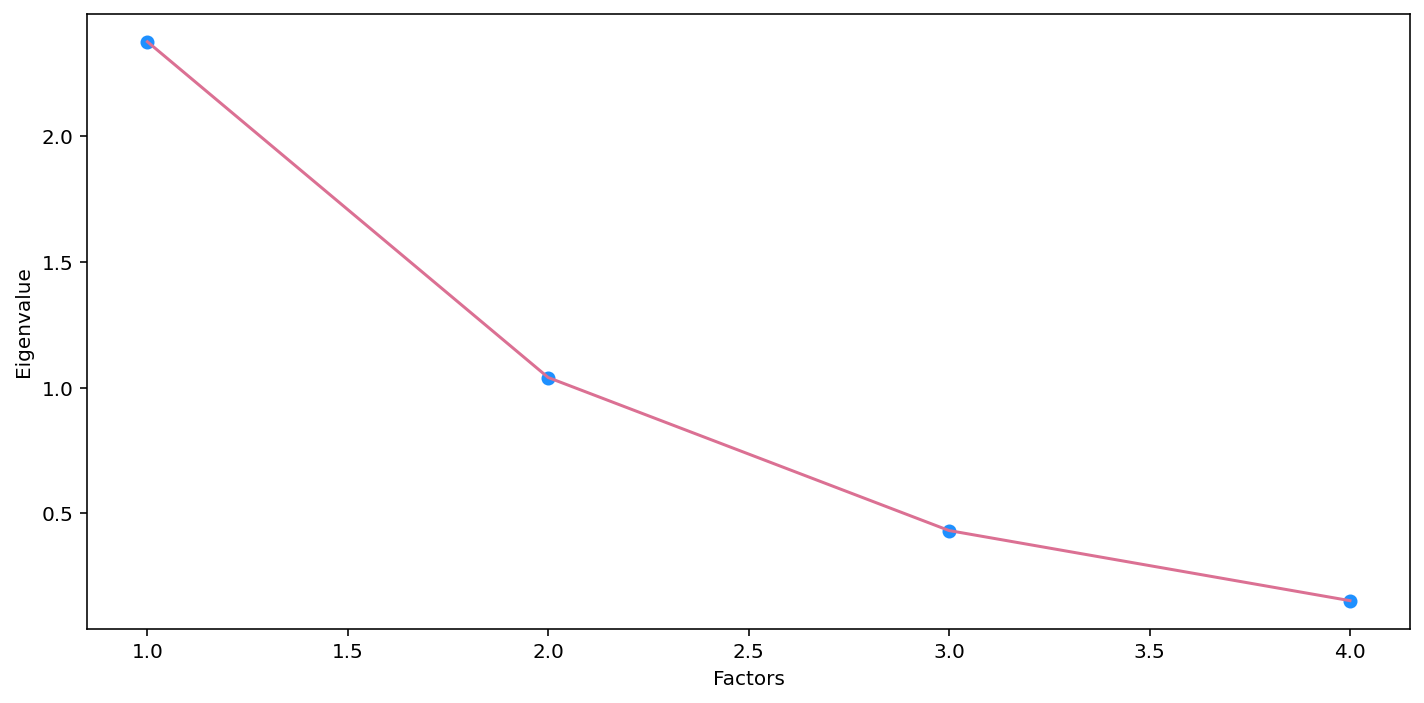

In [ ]:
# get eigenvalues
ev, v = fa.get_eigenvalues()
# figure initialization
fig = plt.figure(figsize = (10, 5))
plt.scatter(range(1, df_FA.shape[1] + 1), ev, color = "dodgerblue")
plt.plot(range(1, df_FA.shape[1] + 1), ev, color = "palevioletred")

# add title and axes labels
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")

# show grid a#nd plot
fig.show()
fig.tight_layout()

# save figure
fig.savefig("FTP_scree_plot.pdf", dpi = 300, format = "pdf")
files.download("FTP_scree_plot.pdf") 

In [ ]:
# print eigenvalues
print(ev)

[2.37668081 1.04009999 0.43112054 0.15209866]


In [ ]:
# factor rotation
fa = FactorAnalyzer(2, rotation="varimax")
fa.fit(df_FA)

# print factor loadings
loads = fa.loadings_
print(loads)

[[ 0.81819397 -0.23424654]
 [ 0.97411717 -0.21470239]
 [-0.23962452  0.66315507]
 [-0.12209558  0.80662688]]


In [ ]:
ev, v = fa.get_eigenvalues()
ev

array([2.37668081, 1.04009999, 0.43112054, 0.15209866])

In [ ]:
# definition of two factors based on factor analysis
factor_1 = df_FA[["zp1", "zp2"]]
factor_2 = df_FA[["zp3", "zp4"]]

# computation of Cronbach's alpha for both factors 
print("factor_1_alpha = ", pg.cronbach_alpha(factor_1))
print("factor_2_alpha = ", pg.cronbach_alpha(factor_2))

factor_1_alpha =  (0.9171645422522423, array([0.904, 0.928]))
factor_2_alpha =  (0.7174178148130885, array([0.673, 0.756]))


# Correlation Analysis

In this section we explore the correlation between all selected variables in the dataframe, grouping the analysis by item domains (demographic, health and well being, personality, satisfaction, FTP). We 

In [ ]:
def corr(column_list, p_labels):
  # correlation matrices between different domains of predictors?
  corr = df[column_list].corr(method = "pearson")
  #sns.heatmap(corr,annot=True,cmap="Blues",vmin=0, vmax=1)
  # Set up the matplotlib plot configuration
  f, ax = plt.subplots(figsize=(15, 10))
  # generate a mask for upper traingle
  mask = np.triu(np.ones_like(corr, dtype = bool))
  # configure a custom diverging colormap
  cmap = sns.diverging_palette(230, 20, as_cmap = True)
  # draw the heatmap, round values to two decimal places
  sns.heatmap(corr, annot = True, mask = mask, cmap = cmap, fmt = ".2f", 
              xticklabels = p_labels,
              yticklabels = p_labels)

### Health & well being & personality

In [ ]:
Sum = satis_var + health_var + pers_var

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

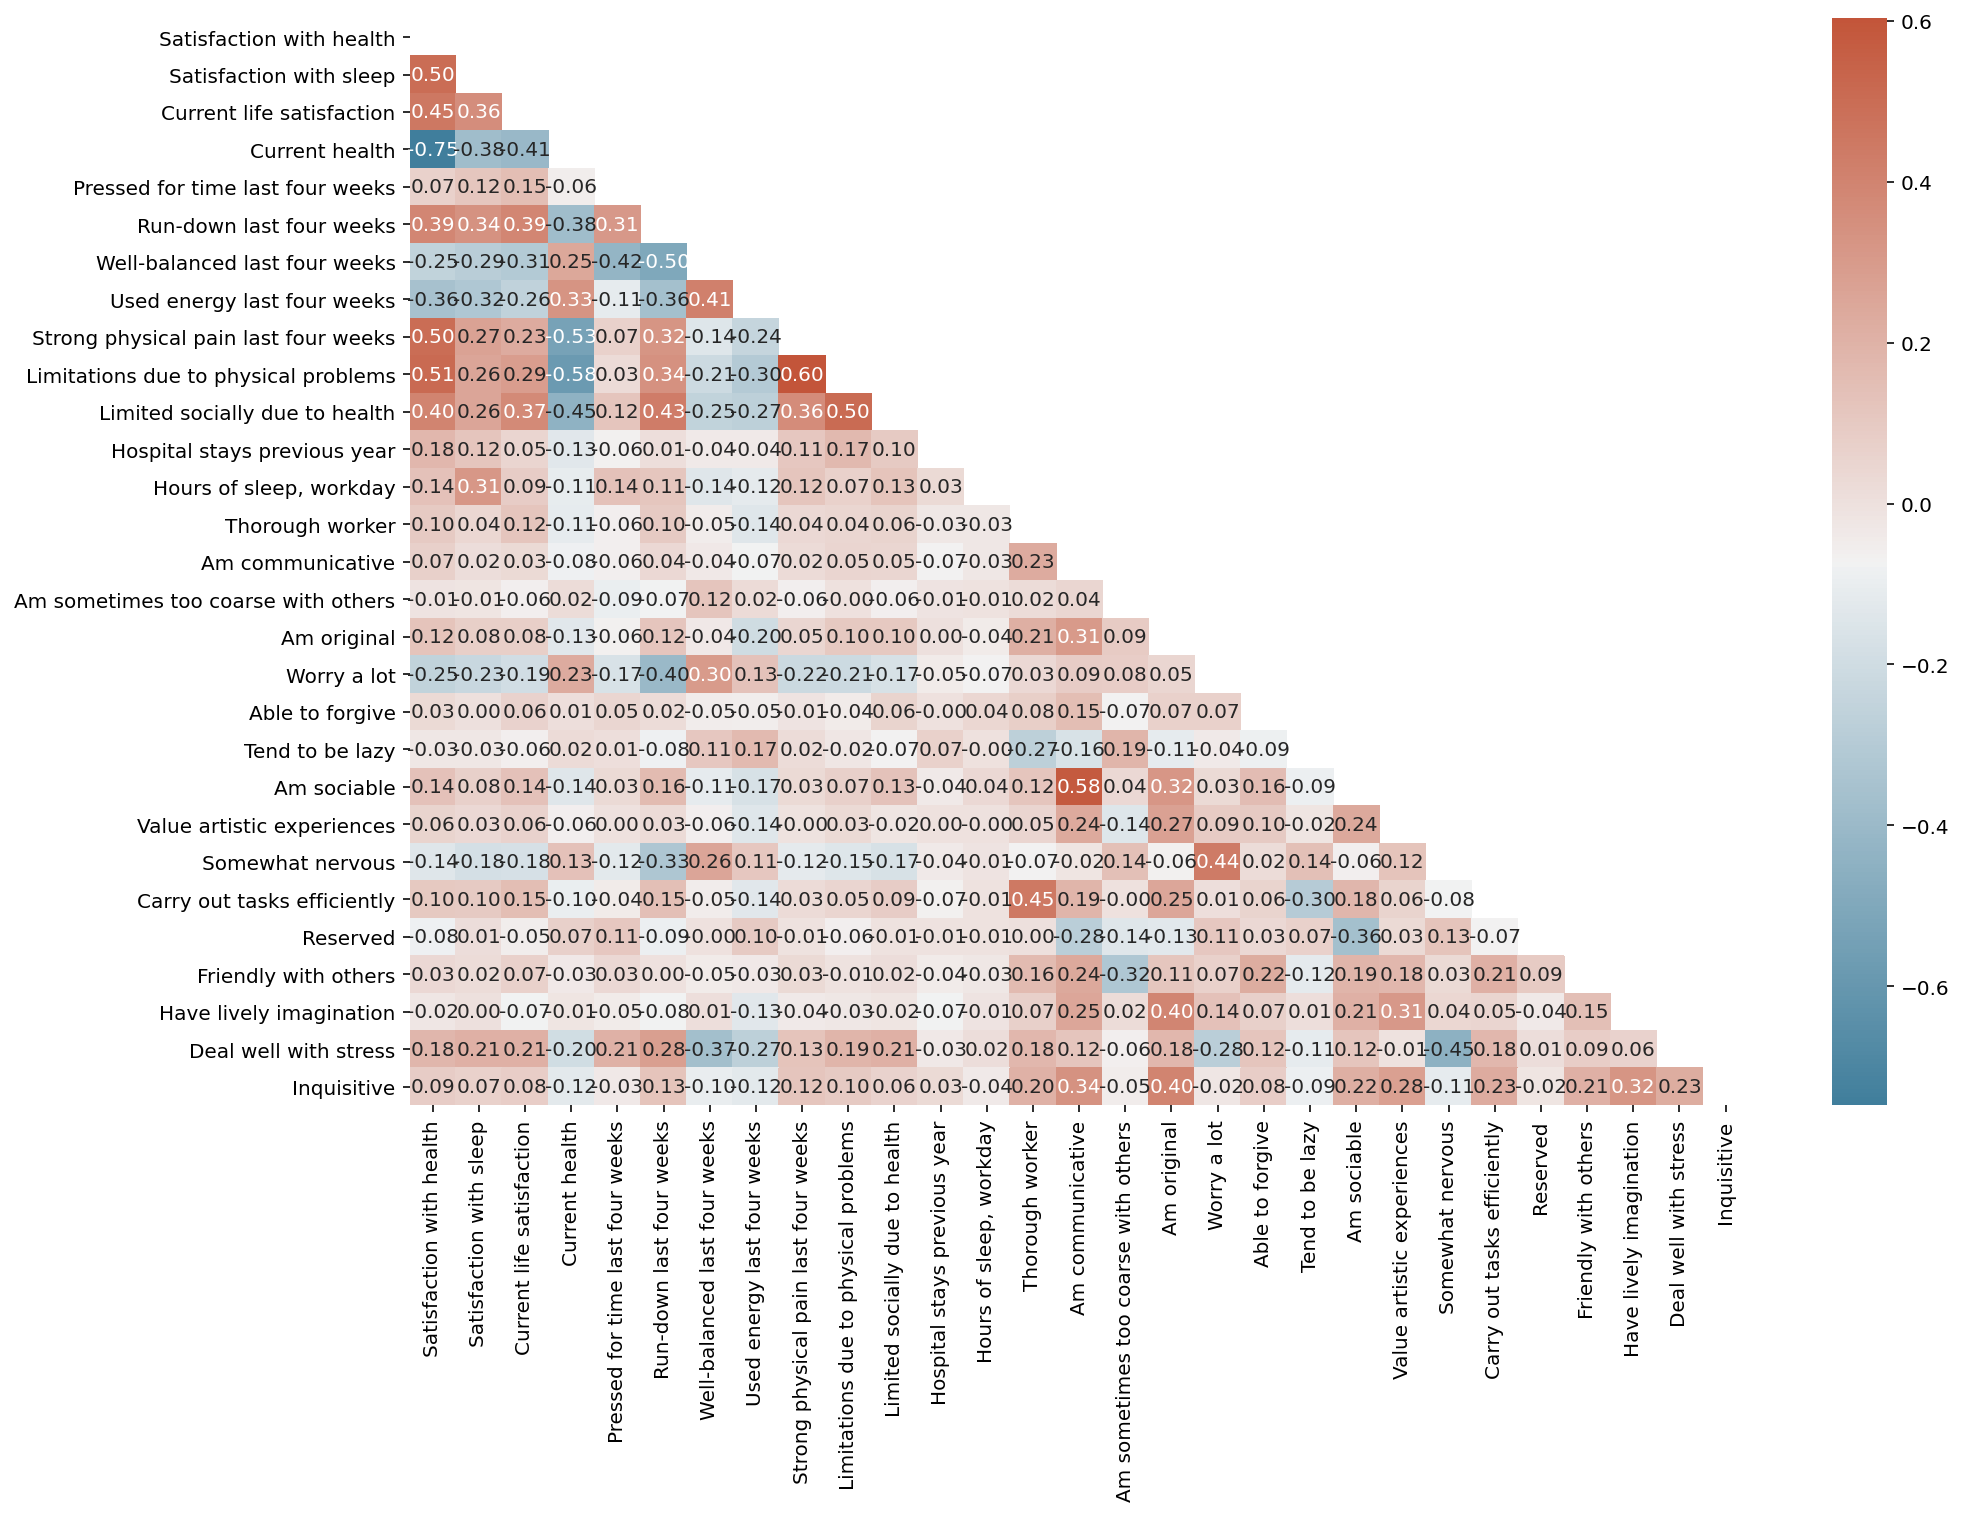

In [ ]:
# generate column including all labels for variables
label_list = ["Satisfaction with health", "Satisfaction with sleep", "Current life satisfaction", "Current health", "Pressed for time last four weeks",
              "Run-down last four weeks", "Well-balanced last four weeks", "Used energy last four weeks", "Strong physical pain last four weeks", "Limitations due to physical problems", "Limited socially due to health", "Hospital stays previous year",
              "Hours of sleep, workday", "Thorough worker", "Am communicative", "Am sometimes too coarse with others", "Am original", "Worry a lot", "Able to forgive", "Tend to be lazy", "Am sociable", "Value artistic experiences", "Somewhat nervous",
              "Carry out tasks efficiently", "Reserved", "Friendly with others", "Have lively imagination", "Deal well with stress", "Inquisitive"]

corr(Sum, p_labels = label_list)
plt.savefig("corr_sum.pdf", dpi = 300, format = "pdf", bbox_inches = "tight", pad_inches = 1)
files.download("corr_sum.pdf")

## FTP & Satisfaction/Well-being

In [ ]:
sats_ftp = ftp_var + satis_var

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

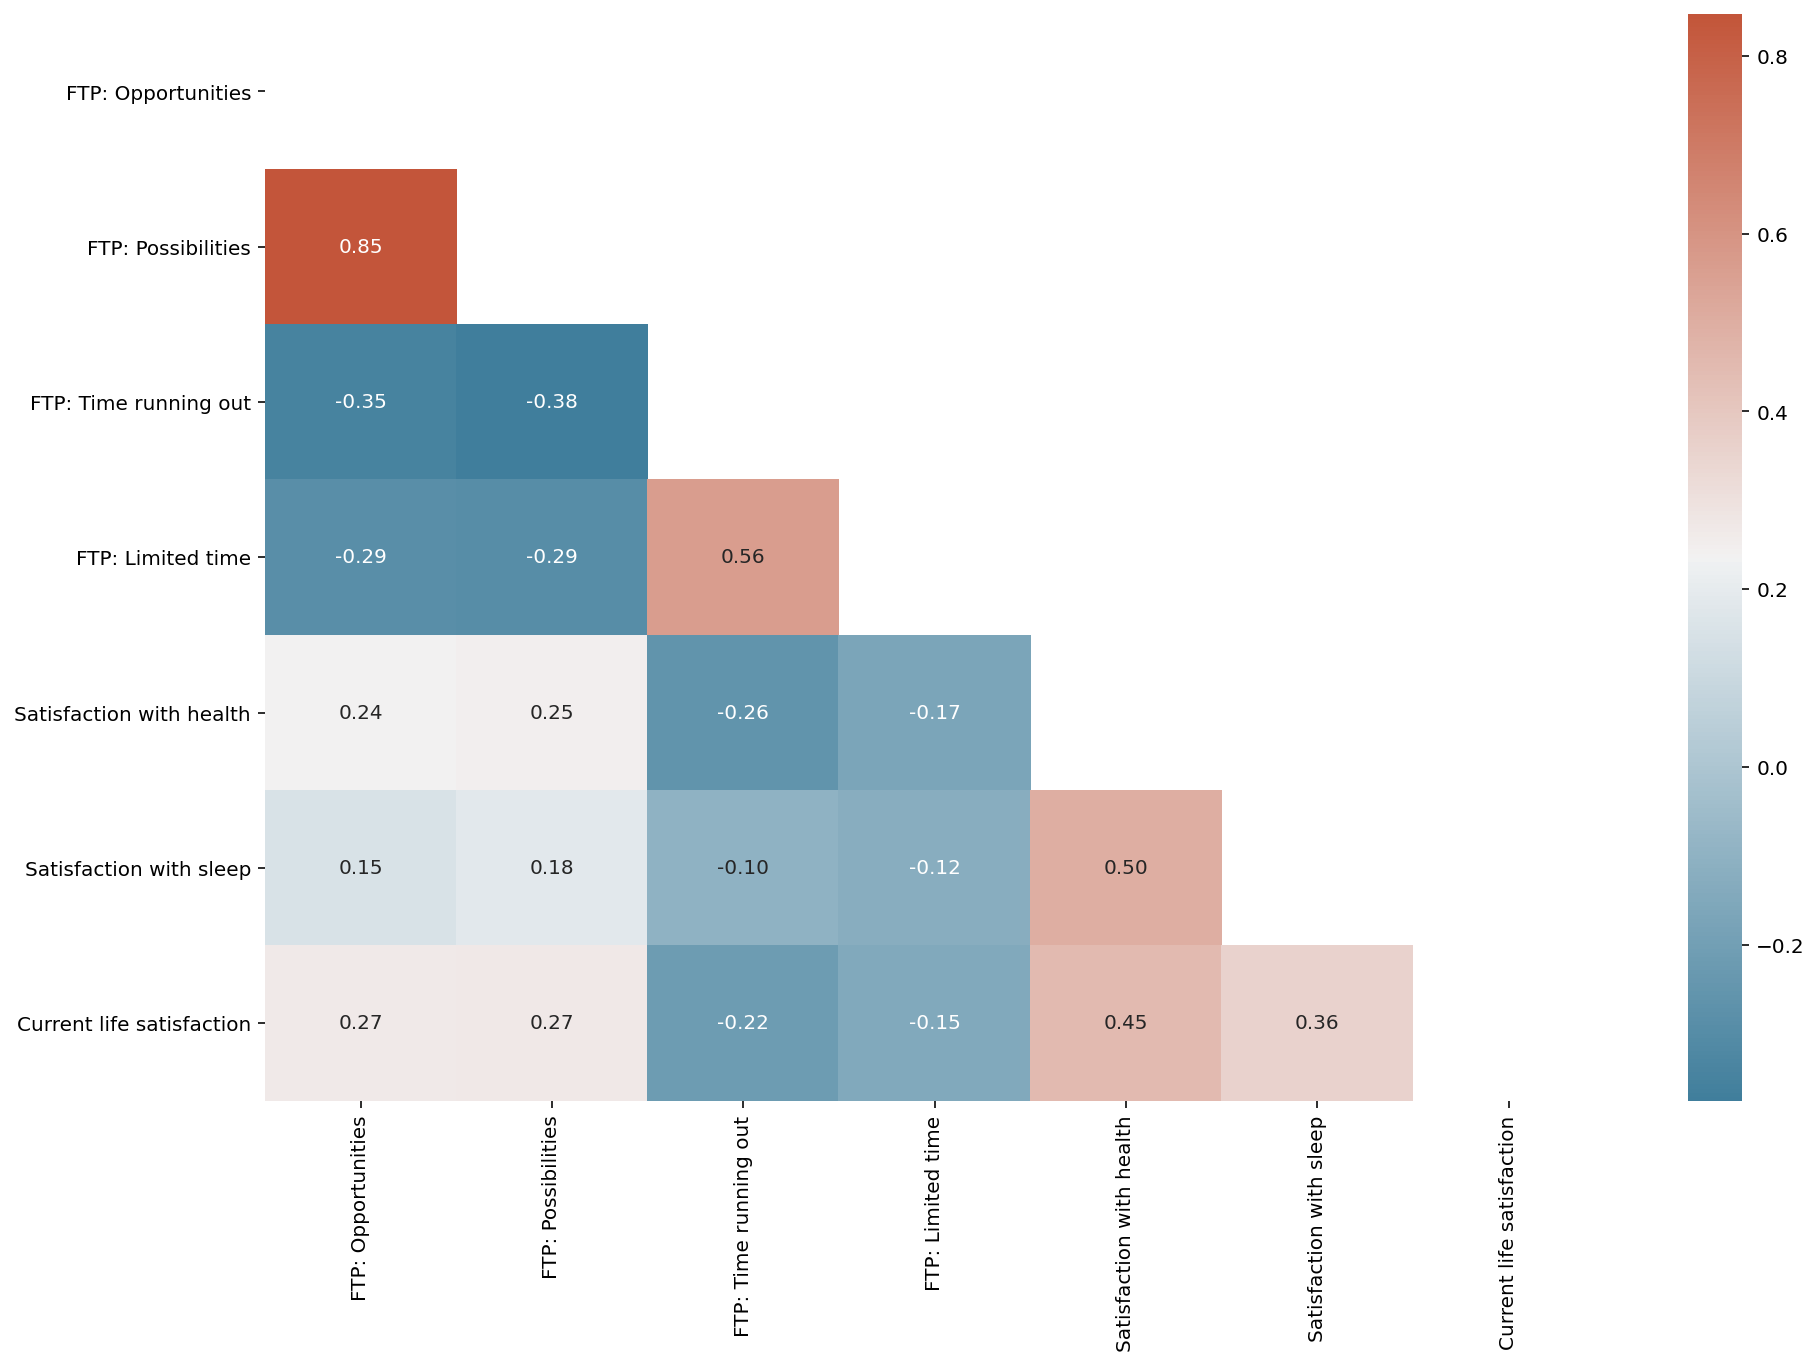

In [ ]:
label_list = ["FTP: Opportunities", "FTP: Possibilities", "FTP: Time running out", "FTP: Limited time", "Satisfaction with health", "Satisfaction with sleep", "Current life satisfaction"]

corr(sats_ftp, p_labels = label_list)
plt.savefig("corr_sats.pdf", dpi = 200,format = "pdf", bbox_inches = "tight", pad_inches = 1)
files.download("corr_sats.pdf")

## FTP & Personality

In [ ]:
ftp_pers = ftp_var + pers_var

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

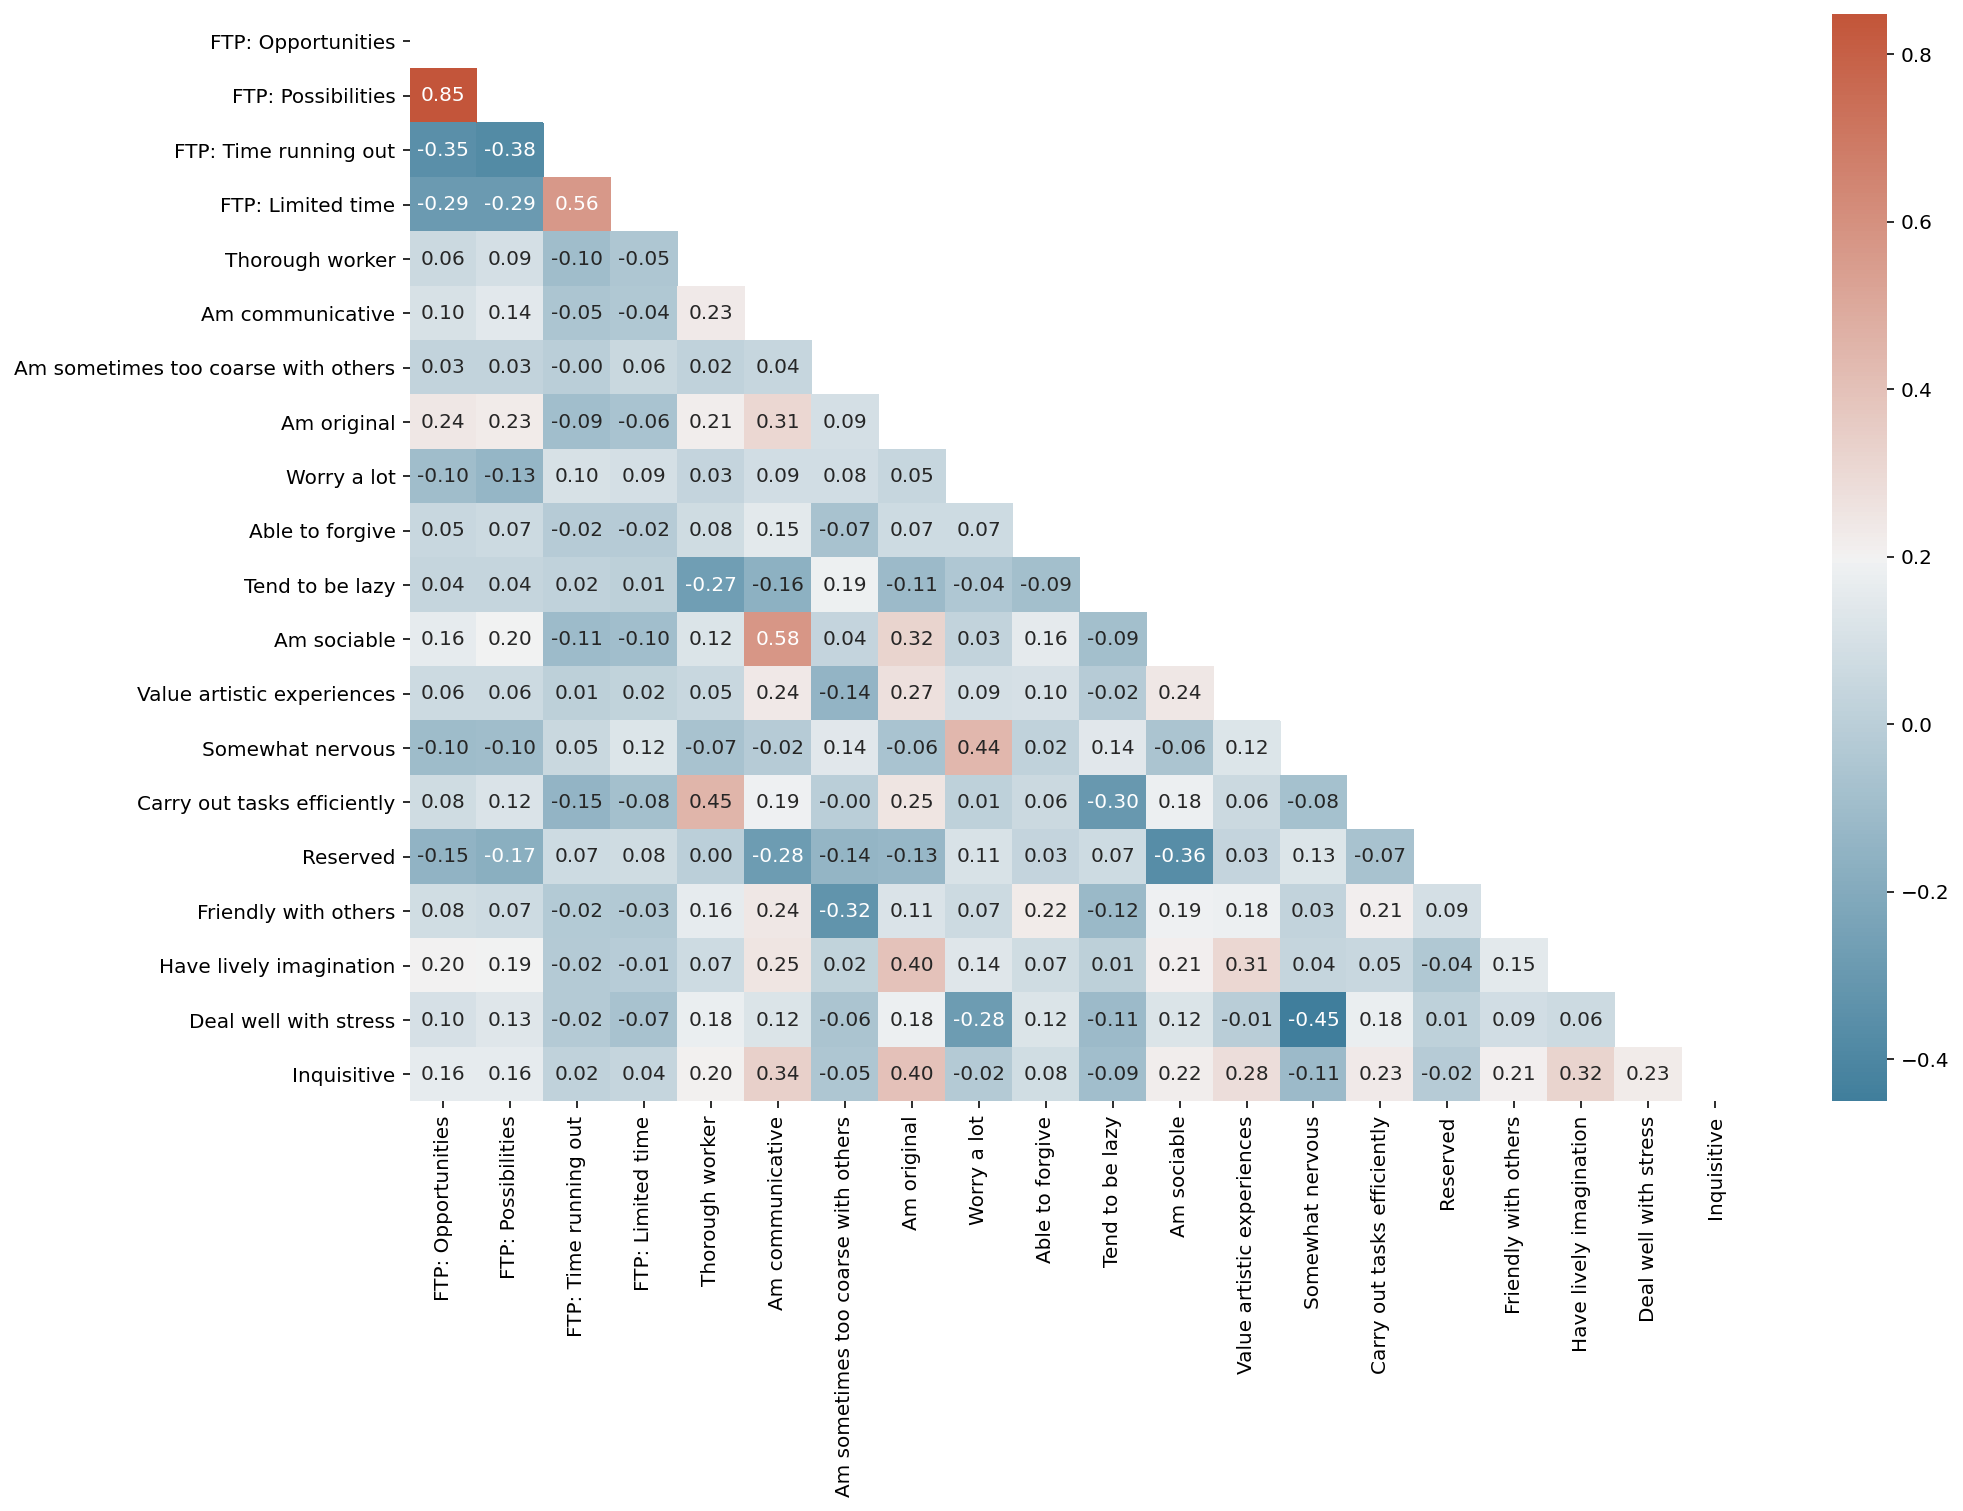

In [ ]:
label_list = ["FTP: Opportunities", "FTP: Possibilities", "FTP: Time running out", "FTP: Limited time", "Thorough worker", "Am communicative", "Am sometimes too coarse with others", "Am original", "Worry a lot", "Able to forgive", "Tend to be lazy", "Am sociable", "Value artistic experiences", "Somewhat nervous",
              "Carry out tasks efficiently", "Reserved", "Friendly with others", "Have lively imagination", "Deal well with stress", "Inquisitive"]

corr(ftp_pers, p_labels = label_list)
plt.savefig("corr_pers.pdf", dpi = 200, format = "pdf", bbox_inches = "tight", pad_inches = 1)
files.download("corr_pers.pdf")

## FTP & Health

In [ ]:
ftp_health = ftp_var + health_var

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

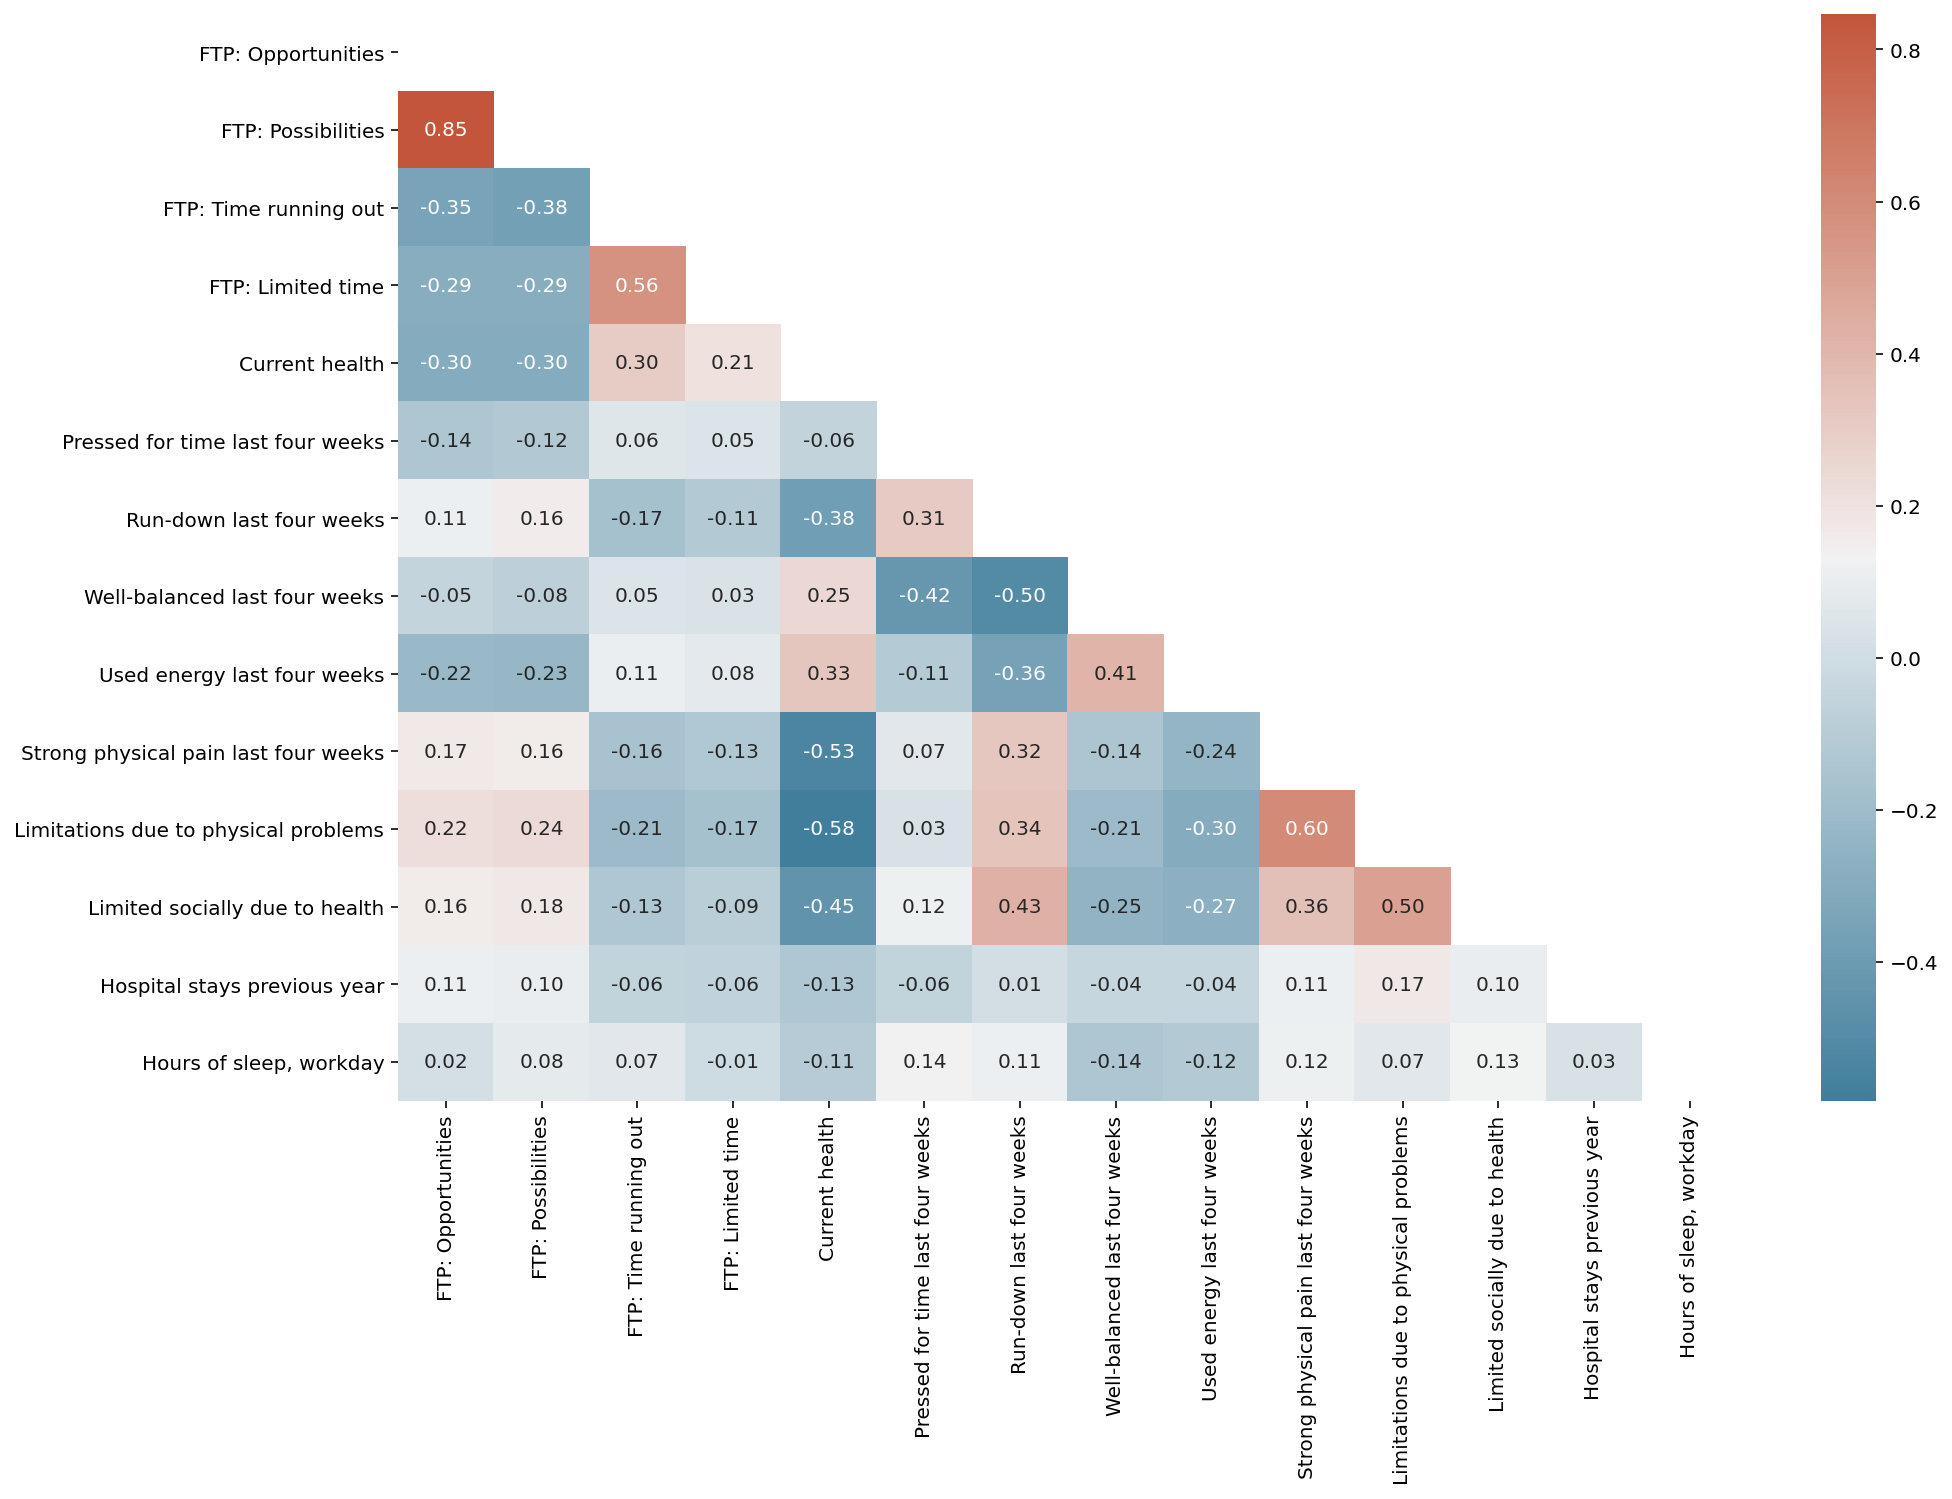

In [ ]:
label_list = ["FTP: Opportunities", "FTP: Possibilities", "FTP: Time running out", "FTP: Limited time", "Current health", "Pressed for time last four weeks",
              "Run-down last four weeks", "Well-balanced last four weeks", "Used energy last four weeks", "Strong physical pain last four weeks", "Limitations due to physical problems", "Limited socially due to health", "Hospital stays previous year",
              "Hours of sleep, workday"]

corr(ftp_health, p_labels = label_list)
plt.savefig("corr_health.pdf", dpi = 200, format = "pdf", bbox_inches = "tight", pad_inches = 1)
files.download("corr_health.pdf")

## FTP & Socio-demographic variables (age, years of education)

In [ ]:
ftp_demo = ftp_var + ["pgbilzt", "age"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

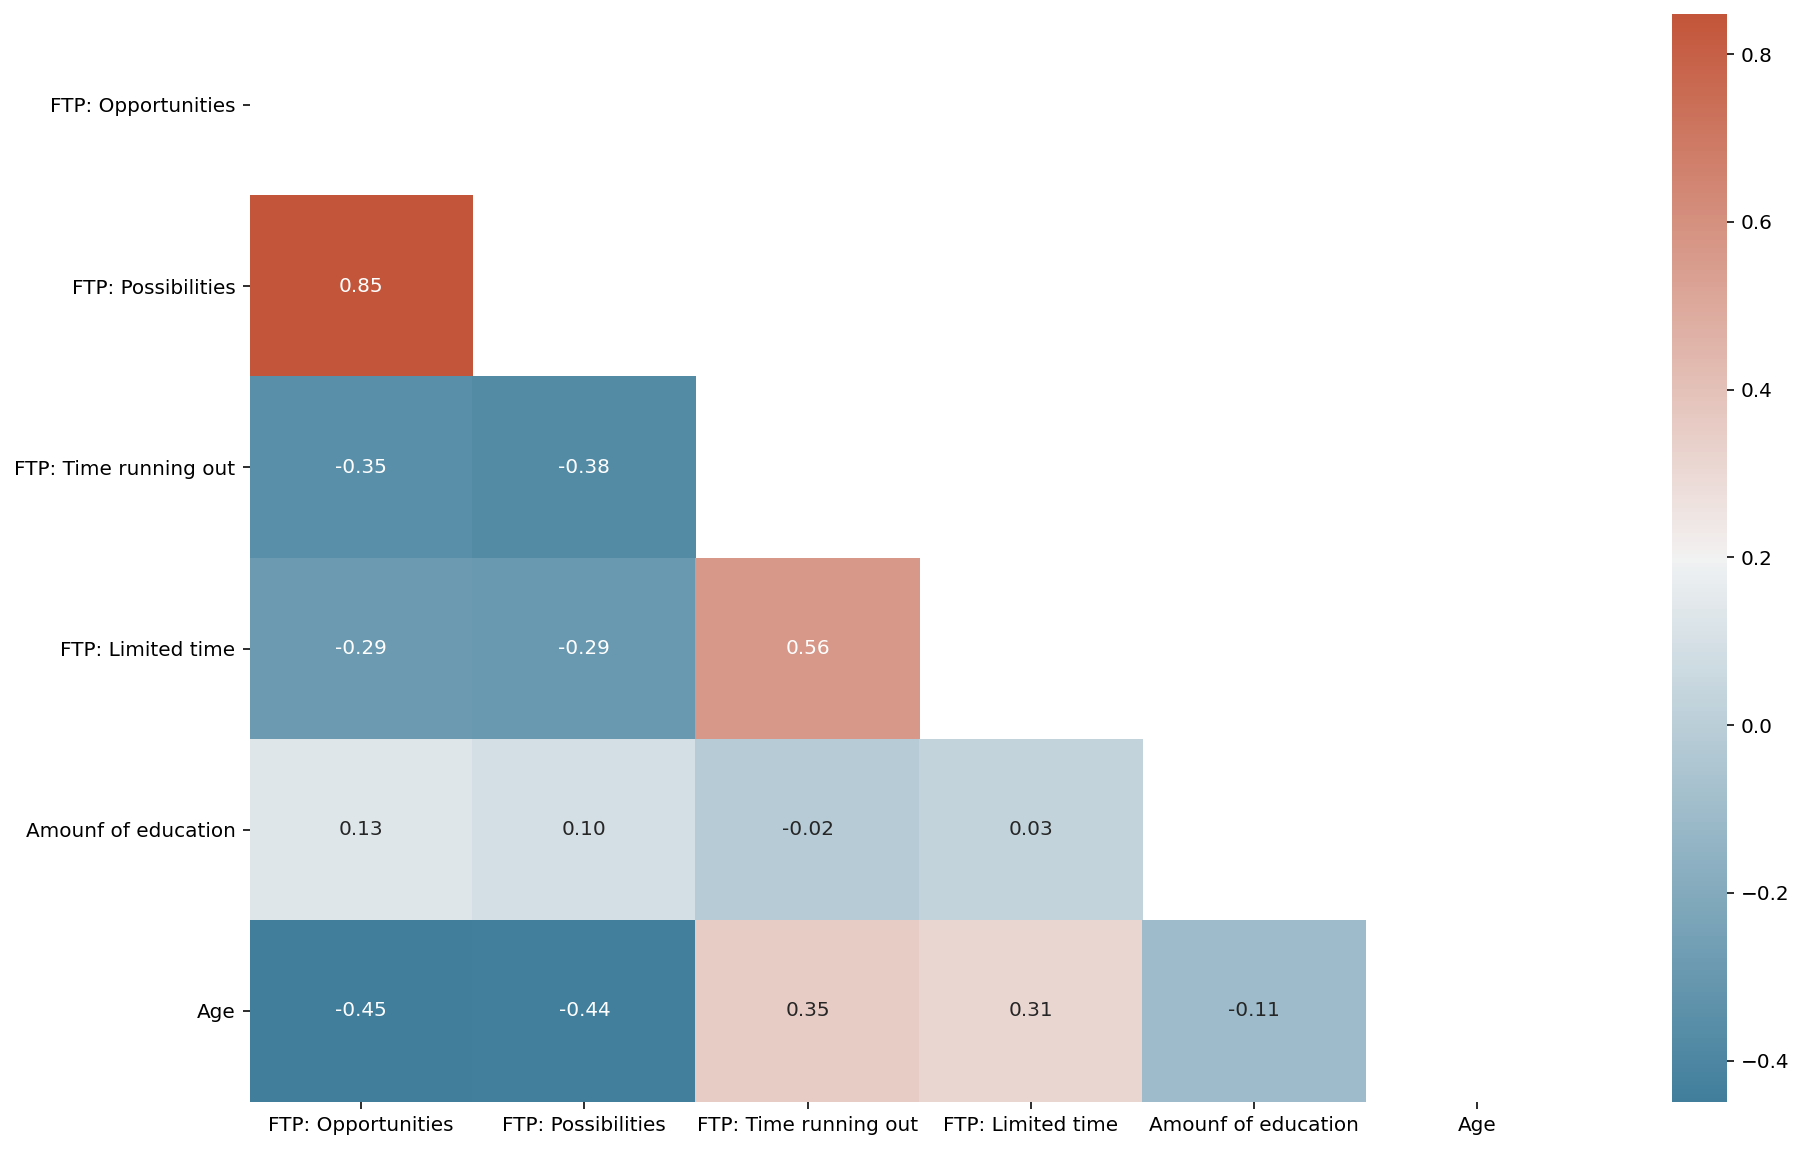

In [ ]:
label_list = ["FTP: Opportunities", "FTP: Possibilities", "FTP: Time running out", "FTP: Limited time", "Amounf of education", "Age"]

corr(ftp_demo, p_labels = label_list)
plt.savefig("corr_demo.pdf", dpi = 200, format = "pdf", bbox_inches = "tight", pad_inches = 1)
files.download("corr_demo.pdf")

## FTP: item difficulty

In [ ]:
# number of options for respondents
k = 5

In [ ]:
# computation of item mean values
zp1_mean = df["zp1"].mean()
zp2_mean = df["zp2"].mean()
zp3_mean = df["zp3"].mean()
zp4_mean = df["zp4"].mean()

In [ ]:
# computation of item difficulties
zp1_diff = zp1_mean/(k-1)
zp2_diff = zp2_mean/(k-1)
zp3_diff = zp3_mean/(k-1)
zp4_diff = zp4_mean/(k-1)

print(zp1_diff, zp2_diff, zp3_diff, zp4_diff)

0.818024861878453 0.8539364640883977 0.49620165745856354 0.7175414364640884


## FTP: item variance

In [ ]:
df_ftp = df[ftp_var]

In [ ]:
# variance
df_ftp.var()

zp1    1.462512
zp2    1.385699
zp3    1.497694
zp4    1.947158
dtype: float64

In [ ]:
# standard deviation
df_ftp.std()

zp1    1.209344
zp2    1.177157
zp3    1.223803
zp4    1.395406
dtype: float64

In [ ]:
# skewness
df_ftp.skew()

zp1   -0.237399
zp2   -0.325302
zp3    0.923455
zp4   -0.018415
dtype: float64

In [ ]:
# kurtosis
df_ftp.kurtosis()

zp1   -0.778114
zp2   -0.697994
zp3   -0.376454
zp4   -1.278226
dtype: float64

In [ ]:
# summary
df_ftp.describe()

,zp1,zp2,zp3,zp4
count,724.000000,724.000000,724.000000,724.000000
mean,3.272099,3.415746,1.984807,2.870166
std,1.209344,1.177157,1.223803,1.395406
min,1.000000,1.000000,1.000000,1.000000
25%,2.750000,3.000000,1.000000,1.000000
50%,3.000000,3.000000,1.000000,3.000000
75%,4.000000,4.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


## FTP: item selectivity

In [ ]:
# create columns with averages of item pairs
df["zp123"] = df[["zp1", "zp2", "zp3"]].sum(axis = 1)/3
df["zp134"] = df[["zp1", "zp3", "zp4"]].sum(axis = 1)/3
df["zp234"] = df[["zp2", "zp3", "zp4"]].sum(axis = 1)/3
df["zp124"] = df[["zp1", "zp2", "zp4"]].sum(axis = 1)/3

In [ ]:
# print part-whole-correction
print("The part-whole-correction for zp1 is {}.".format(round(df["zp1"].corr(df["zp234"]), 3)))
print("The part-whole-correction for zp1 is {}.".format(round(df["zp2"].corr(df["zp134"]), 3)))
print("The part-whole-correction for zp1 is {}.".format(round(df["zp3"].corr(df["zp124"]), 3)))
print("The part-whole-correction for zp1 is {}.".format(round(df["zp4"].corr(df["zp123"]), 3)))

The part-whole-correction for zp1 is 0.076.
The part-whole-correction for zp1 is 0.072.
The part-whole-correction for zp1 is -0.035.
The part-whole-correction for zp1 is -0.001.


In [ ]:
# correlation among FTP items
df_ftp.corr()

,zp1,zp2,zp3,zp4
zp1,1.000000,0.847311,-0.351395,-0.288852
zp2,0.847311,1.000000,-0.375808,-0.292116
zp3,-0.351395,-0.375808,1.000000,0.564177
zp4,-0.288852,-0.292116,0.564177,1.000000


# Composite Scales 

In this section, composite scales for socio-demographic, personality, and FTP items are generated. In preparation for the regression analysis some categorical variables are also recoded as "dummy variables" e.g. marital status response codes are converted in 0 or 1, expressing "not in a relationship" and "in a relationship" respectively. Additionally, some personality items' response values are also recoded in the direction of the personality trait.

## Age groups

In [ ]:
df["age"].min()

17

In [ ]:
df[df.age == 17]["pid"].count()

2

In [ ]:
# check for U-shaped age effect
bins  = [16, 39, 59, 121]
names = ["17-39", "40-59", "60+"]
df["AgeGroup"] = pd.cut(df["age"], bins, labels = names)
df["AgeGroup"].value_counts()

60+      286
40-59    253
17-39    185
Name: AgeGroup, dtype: int64

In [ ]:
df[["age", "AgeGroup"]]

,age,AgeGroup
14803,39,17-39
14813,48,40-59
14825,61,60+
14829,27,17-39
14832,37,17-39
...,...,...
26690,64,60+
26702,31,17-39
26720,36,17-39
26737,73,60+


In [ ]:
# check whether group assignment worked correctly
df_test = df[df["age"] == 30]

In [ ]:
df_test["AgeGroup"]

15273    17-39
15862    17-39
15865    17-39
17575    17-39
19353    17-39
24106    17-39
25273    17-39
Name: AgeGroup, dtype: category
Categories (3, object): ['17-39' < '40-59' < '60+']

In [ ]:
df.AgeGroup

14803    17-39
14813    40-59
14825      60+
14829    17-39
14832    17-39
         ...  
26690      60+
26702    17-39
26720    17-39
26737      60+
26743      60+
Name: AgeGroup, Length: 724, dtype: category
Categories (3, object): ['17-39' < '40-59' < '60+']

## Marital status 
We recode the values in column 'pld0131' according to whether they are in a relationship (1) or not (0). 

In [ ]:
#(labels from https://paneldata.org/soep-is/data/p/pld0131) 
recode_dict = {1:1, # married
               2:0, # married,separated
               3:0, # single
               4:0, # divorced
               5:0, # widowed
               6:1, # registered same sex partnership
               7:0} # registered same sex partnership, separated

df['pld0131_m'] = df['pld0131'].map(recode_dict) 

In [ ]:
df['pld0131_m'].value_counts()

1    370
0    354
Name: pld0131_m, dtype: int64

## Employment status
We recode the values in column 'plb0022' accoridng to whether they are working at the time of the survey (1) or not (0).

In [ ]:
#(labels from https://paneldata.org/soep-is/data/p/plb0022) 
recode_dict = {1:1,	# Full-Time Employment
               2:1,	# Regular Part-Time Employment
               3:1,	# Vocational Training
               4:1,	# Marginally employed
               5:0,	# Near Retirement, Zero Working Hours
               6:1,	# Military Service
               7:1,	# Community Service	
               8:1,	# Sheltered workshop
               9:0}	# Not Employed

df['plb0022_m'] = df['plb0022'].map(recode_dict)

In [ ]:
df['plb0022_m'].value_counts()

1    408
0    316
Name: plb0022_m, dtype: int64

## Number of education years
We recode the values in column 'pgbilzt' according to whether the number of education years is below average (0), average(1) or above average (2). The "average range" covers the mean of 'pgbilzt' +-1 std.

In [ ]:
df["pgbilzt"].min()

7.0

In [ ]:
df[df["pgbilzt"] == 7]["pid"].count()

12

In [ ]:
def record_function(value):
  m = df["pgbilzt"].mean()
  s = df["pgbilzt"].std()

  if value <= (m-s):
    return "1"
  elif (value > (m-s)) and (value < (m+s)):
    return "2"
  elif value >= (m+s):
    return "3"

df["pgbilzt_m"] = df["pgbilzt"].map(record_function)

In [ ]:
df["pgbilzt_m"].value_counts()

2    540
3    125
1     59
Name: pgbilzt_m, dtype: int64

## BFI items

Items measuring the Big 5 personality traits are assigned to the trait/factor they are indicative of. Mean scores for each personality trait/factor are computed. 

In [ ]:
# (1) conscientiousness
df["plh0218_rec"] = df["plh0218"].replace({1:7, 2:6, 3:5, 5:3, 6:2, 7:1})        # item needs to be recoded (in the direction of the personality trait)
df["bfi_consc"]   = df[["plh0212", "plh0218_rec", "plh0222"]].mean(axis = 1)

In [ ]:
# check
df[["plh0212", "plh0218_rec", "plh0222", "bfi_consc"]]

,plh0212,plh0218_rec,plh0222,bfi_consc
14803,7.0,7.0,7.0,7.000000
14813,7.0,6.0,6.0,6.333333
14825,2.0,3.0,4.0,3.000000
14829,5.0,5.0,6.0,5.333333
14832,7.0,6.0,6.0,6.333333
...,...,...,...,...
26690,7.0,7.0,7.0,7.000000
26702,7.0,7.0,7.0,7.000000
26720,7.0,7.0,7.0,7.000000
26737,7.0,7.0,7.0,7.000000


In [ ]:
# (2) extraversion
df["plh0223_rec"] = df["plh0223"].replace({1:7, 2:6, 3:5, 5:3, 6:2, 7:1})        # item needs to be recoded (in the direction of the personality trait)
df["bfi_extrav"]  = df[["plh0213", "plh0219", "plh0223_rec"]].mean(axis = 1)

In [ ]:
# check
df[["plh0213", "plh0219", "plh0223_rec", "bfi_extrav"]]

,plh0213,plh0219,plh0223_rec,bfi_extrav
14803,7.0,4.0,3.0,4.666667
14813,7.0,6.0,7.0,6.666667
14825,3.0,4.0,4.0,3.666667
14829,6.0,4.0,5.0,5.000000
14832,6.0,5.0,2.0,4.333333
...,...,...,...,...
26690,7.0,7.0,3.0,5.666667
26702,5.0,7.0,6.0,6.000000
26720,7.0,7.0,7.0,7.000000
26737,4.0,5.0,3.0,4.000000


In [ ]:
# (3) agreeableness
df["plh0214_rec"] = df["plh0214"].replace({1:7, 2:6, 3:5, 5:3, 6:2, 7:1})        # item needs to be recoded (in the direction of the personality trait)
df["bfi_agree"]   = df[["plh0214_rec", "plh0217", "plh0224"]].mean(axis = 1)

In [ ]:
# check
df[["plh0214_rec", "plh0217", "plh0224", "bfi_agree"]]

,plh0214_rec,plh0217,plh0224,bfi_agree
14803,7.0,7.0,7.0,7.000000
14813,7.0,5.0,6.0,6.000000
14825,6.0,5.0,6.0,5.666667
14829,4.0,5.0,4.0,4.333333
14832,5.0,5.0,6.0,5.333333
...,...,...,...,...
26690,1.0,7.0,6.0,4.666667
26702,5.0,3.0,4.0,4.000000
26720,7.0,5.0,7.0,6.333333
26737,7.0,7.0,6.0,6.666667


In [ ]:
# (4) openness
df["bfi_open"]   = df[["plh0215", "plh0220", "plh0225"]].mean(axis = 1)

In [ ]:
# check
df[["plh0215", "plh0220", "plh0225", "bfi_open"]]

,plh0215,plh0220,plh0225,bfi_open
14803,7.0,6.0,5.0,6.000000
14813,6.0,4.0,6.0,5.333333
14825,2.0,6.0,2.0,3.333333
14829,4.0,3.0,4.0,3.666667
14832,6.0,7.0,6.0,6.333333
...,...,...,...,...
26690,7.0,7.0,7.0,7.000000
26702,5.0,5.0,1.0,3.666667
26720,7.0,4.0,7.0,6.000000
26737,7.0,5.0,6.0,6.000000


In [ ]:
# (5) neuroticism
df["plh0226_rec"] = df["plh0226"].replace({1:7, 2:6, 3:5, 5:3, 6:2, 7:1})        # item needs to be recoded (in the direction of the personality trait)
df["bfi_neurot"]  = df[["plh0216", "plh0221", "plh0226_rec"]].mean(axis = 1)

In [ ]:
# check
df[["plh0216", "plh0221", "plh0226_rec", "bfi_neurot"]]

,plh0216,plh0221,plh0226_rec,bfi_neurot
14803,5.0,4.0,4.0,4.333333
14813,5.0,1.0,3.0,3.000000
14825,4.0,6.0,6.0,5.333333
14829,6.0,3.0,3.0,4.000000
14832,7.0,5.0,7.0,6.333333
...,...,...,...,...
26690,6.0,4.0,3.0,4.333333
26702,1.0,4.0,5.0,3.333333
26720,4.0,1.0,2.0,2.333333
26737,5.0,1.0,2.0,2.666667


## FTP items

For each of the two extracted factors (focus on opportunities 'FTP_opp', focus on limitations 'FTP_lim'), mean scores are computed.

In [ ]:
df["FTP_opp"] = df[["zp1", "zp2"]].mean(axis = 1)
df["FTP_lim"] = df[["zp3", "zp4"]].mean(axis = 1)

In [ ]:
# check 
df[["FTP_opp", "FTP_lim", "zp1", "zp2", "zp3", "zp4"]]

,FTP_opp,FTP_lim,zp1,zp2,zp3,zp4
14803,5.0,1.0,5.0,5.0,1.0,1.0
14813,4.0,1.0,3.0,5.0,1.0,1.0
14825,2.0,3.0,2.0,2.0,3.0,3.0
14829,4.0,1.0,4.0,4.0,1.0,1.0
14832,2.5,1.0,2.0,3.0,1.0,1.0
...,...,...,...,...,...,...
26690,5.0,1.0,5.0,5.0,1.0,1.0
26702,5.0,1.0,5.0,5.0,1.0,1.0
26720,5.0,1.0,5.0,5.0,1.0,1.0
26737,3.0,2.0,3.0,3.0,1.0,3.0


<bound method Figure.tight_layout of <Figure size 1080x504 with 1 Axes>>

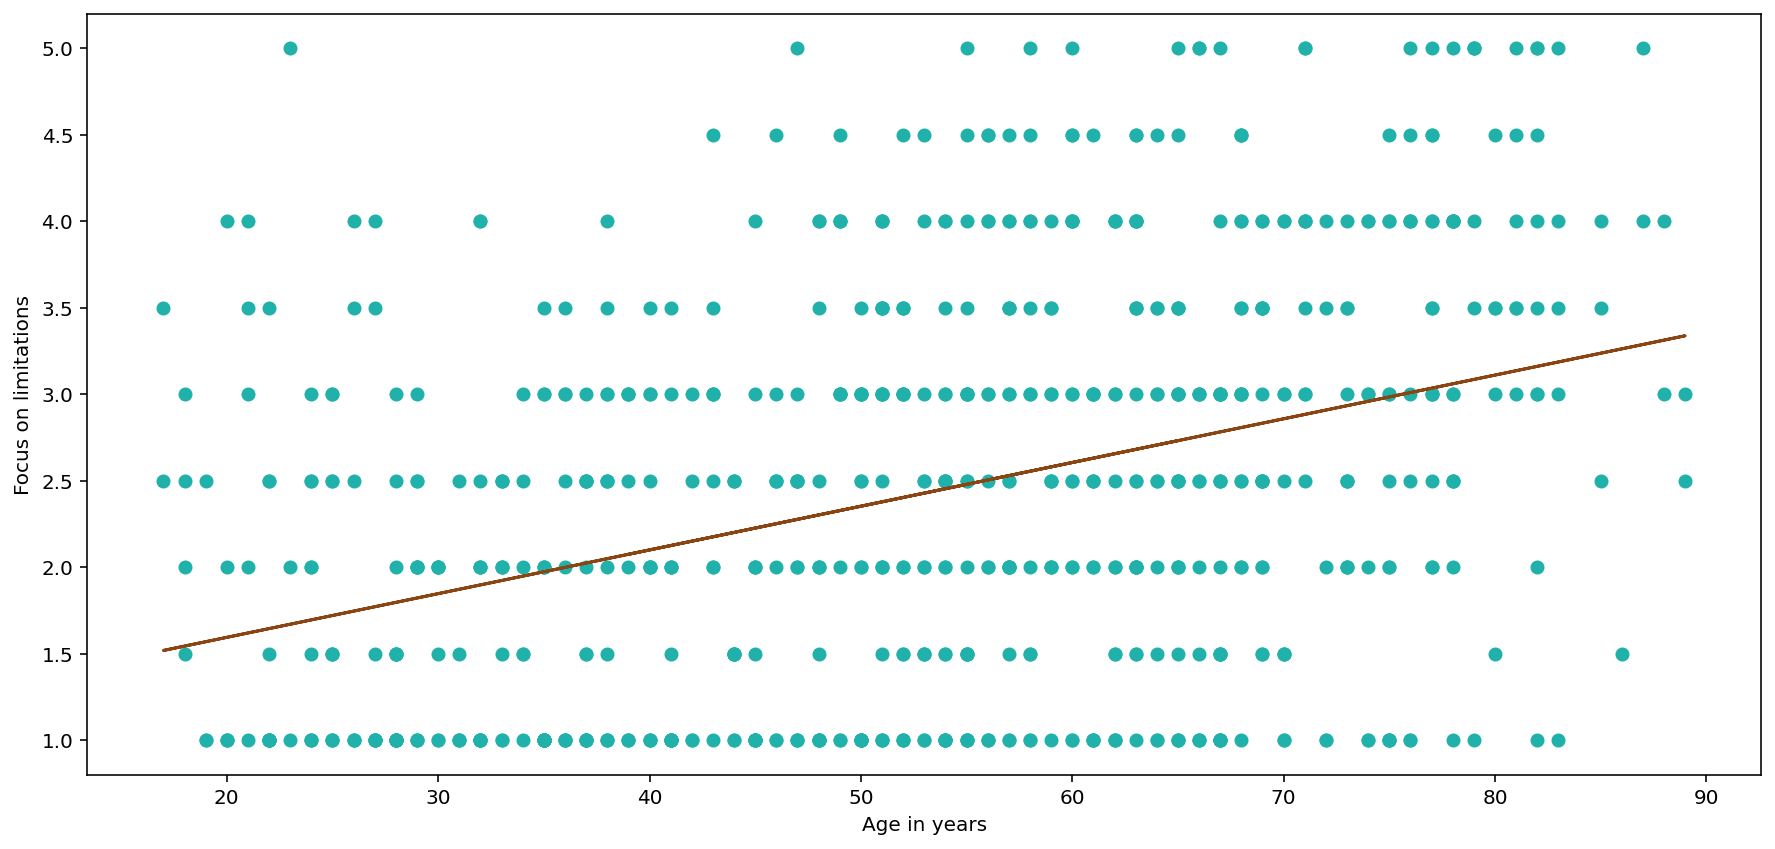

In [ ]:
# relationship between age and FTP
fig = plt.figure(figsize = (15,7))

plt.scatter(x     = df["age"],
            y     = df["FTP_lim"],
            color = "lightseagreen")

# add labels for axes
plt.xlabel("Age in years")
plt.ylabel("Focus on limitations")

# fit regression line 
m, b = np.polyfit(df["age"], df["FTP_lim"], 1)
plt.plot(df["age"], 
         m*df["age"] + b,
         color = "saddlebrown")

fig.tight_layout

<bound method Figure.tight_layout of <Figure size 1080x504 with 1 Axes>>

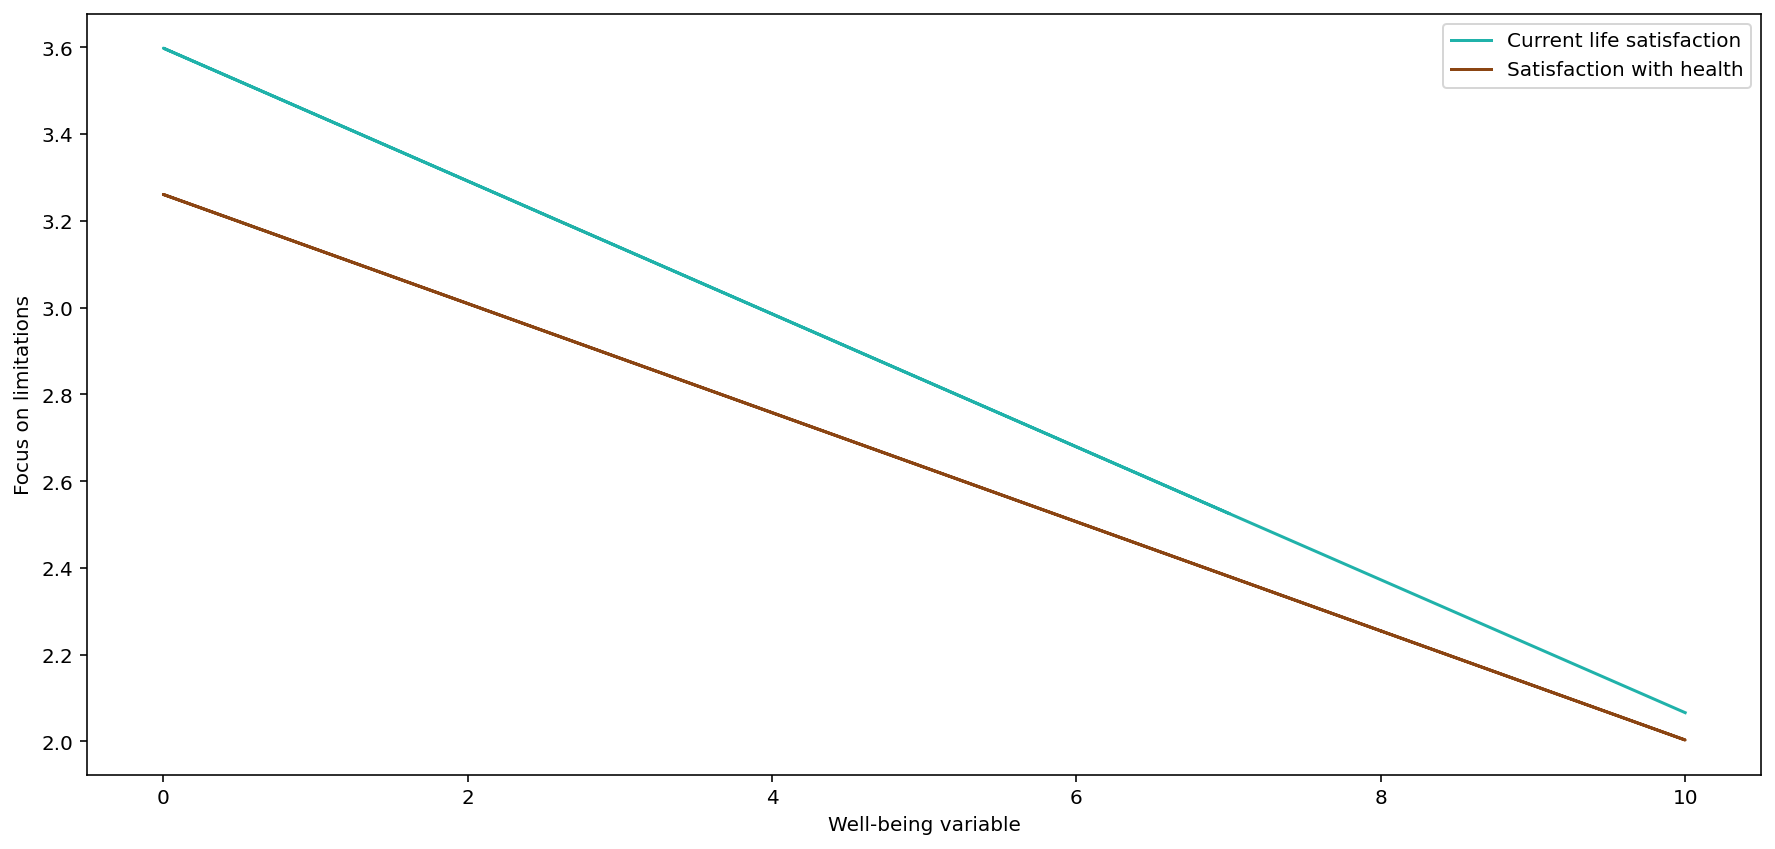

In [ ]:
# relationship between well-being variables and FTP
fig = plt.figure(figsize = (15,7))

# add labels for axes
plt.xlabel("Well-being variable")
plt.ylabel("Focus on limitations")

# fit regression lines 
m, b = np.polyfit(df["plh0182"], df["FTP_lim"], 1)
plt.plot(df["plh0182"], 
         m*df["plh0182"] + b,
         color = "lightseagreen",
         label = "Current life satisfaction")

m, b = np.polyfit(df["plh0171"], df["FTP_lim"], 1)
plt.plot(df["plh0171"], 
         m*df["plh0171"] + b,
         color = "saddlebrown",
         label = "Satisfaction with health")

# add legend
plt.legend()

fig.tight_layout

<bound method Figure.tight_layout of <Figure size 1080x504 with 1 Axes>>

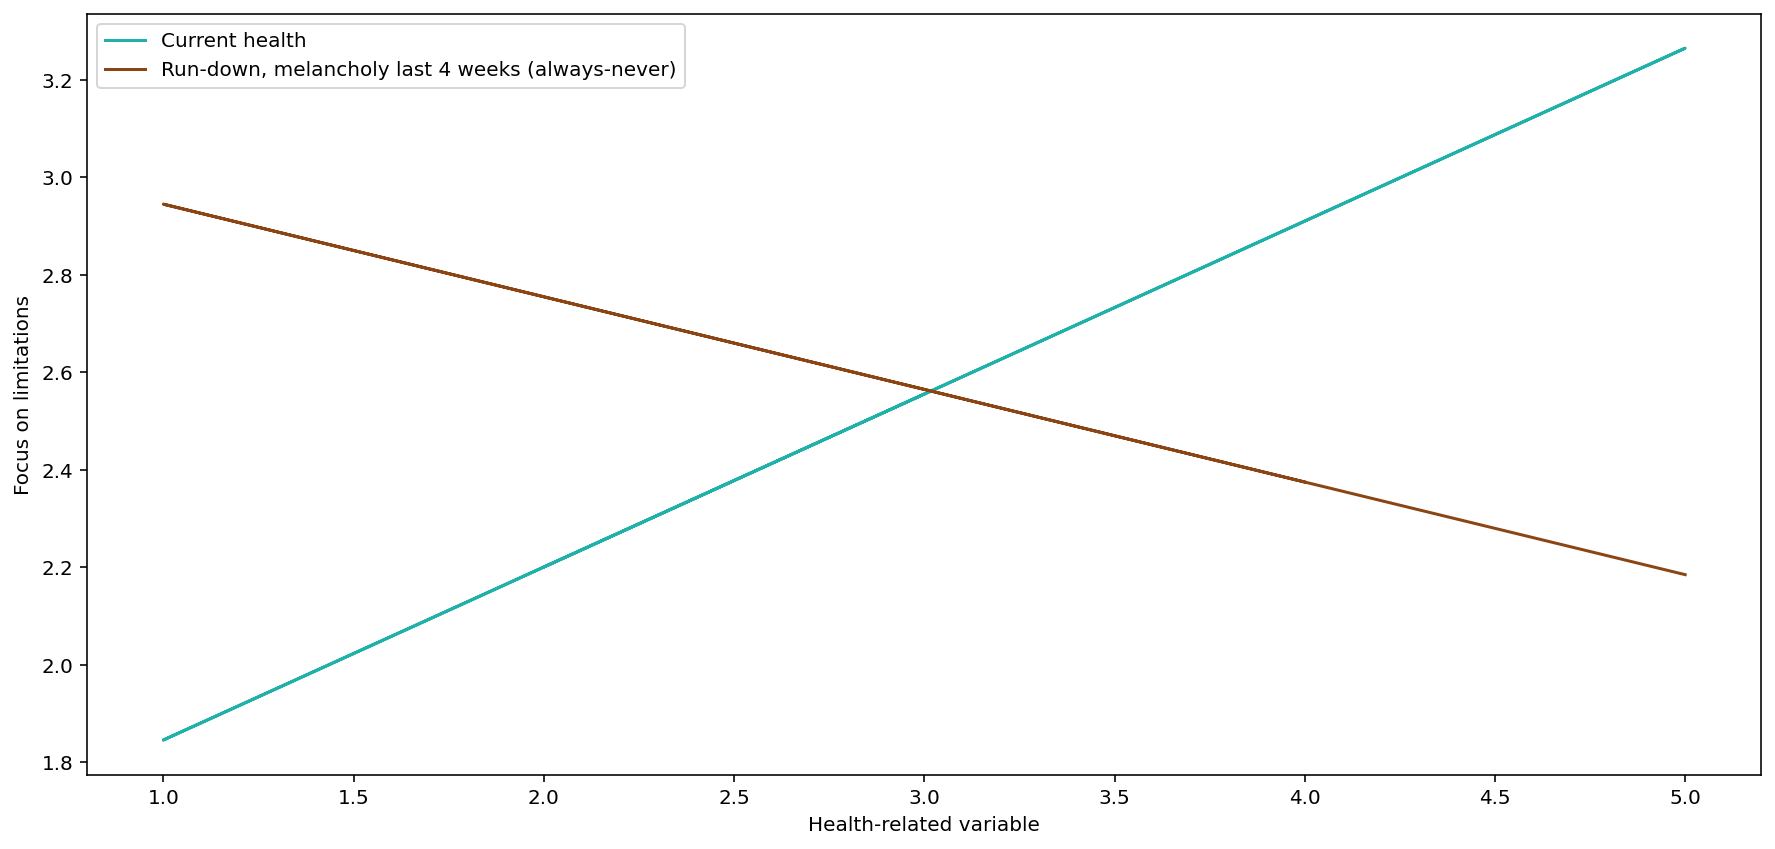

In [ ]:
# relationship between health-related variables and FTP
fig = plt.figure(figsize = (15,7))

# add labels for axes
plt.xlabel("Health-related variable")
plt.ylabel("Focus on limitations")

# fit regression lines
m, b = np.polyfit(df["ple0008"], df["FTP_lim"], 1)
plt.plot(df["ple0008"], 
         m*df["ple0008"] + b,
         color = "lightseagreen",
         label = "Current health")
 
m, b = np.polyfit(df["ple0027"], df["FTP_lim"], 1)
plt.plot(df["ple0027"], 
         m*df["ple0027"] + b,
         color = "saddlebrown",
         label = "Run-down, melancholy last 4 weeks (always-never)")

# add legend
plt.legend()

fig.tight_layout

<bound method Figure.tight_layout of <Figure size 1080x504 with 1 Axes>>

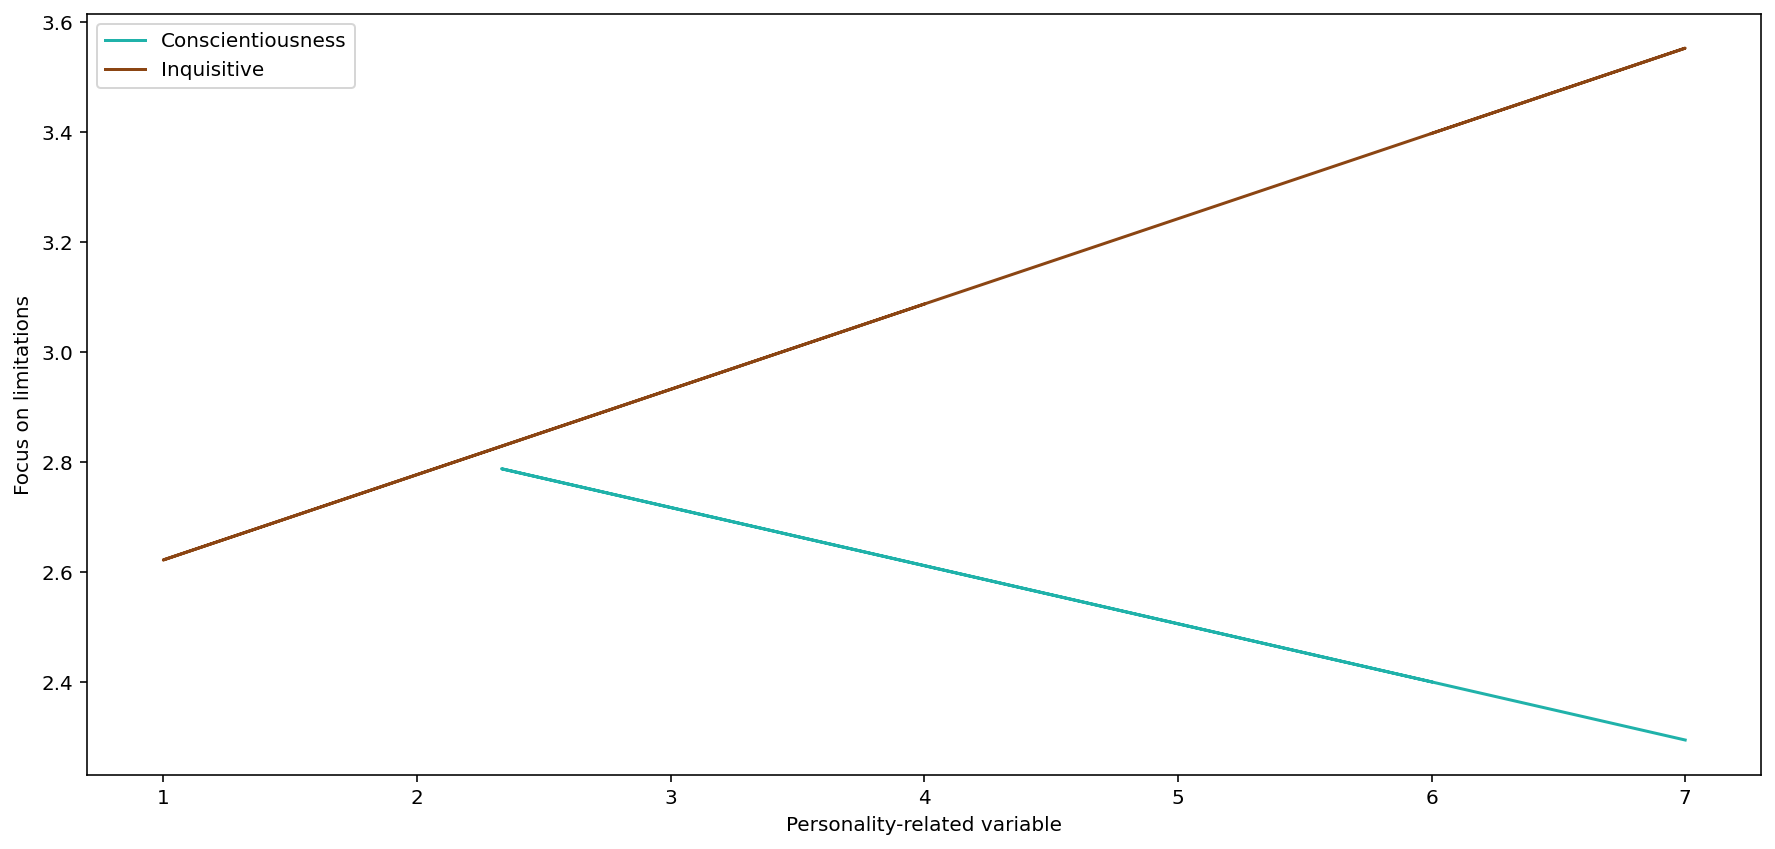

In [ ]:
# relationship between personality-related variables and FTP
fig = plt.figure(figsize = (15,7))

# fit regression lines 
m, b = np.polyfit(df["bfi_consc"], df["FTP_lim"], 1)
plt.plot(df["bfi_consc"], 
         m*df["bfi_consc"] + b,
         color = "lightseagreen",
         label = "Conscientiousness")

m, b = np.polyfit(df["plh0255"], df["FTP_opp"], 1)
plt.plot(df["plh0255"], 
         m*df["plh0255"] + b,
         color = "saddlebrown",
         label = "Inquisitive")

# add labels for axes
plt.xlabel("Personality-related variable")
plt.ylabel("Focus on limitations")

# add legend
plt.legend()

fig.tight_layout

## Standardization of the continuous independent variables

In this section, continuous independent variables are standardized in order to control for their different scales. 

In [ ]:
scaler   = StandardScaler()

In [ ]:
# list of variables to be scaled
var_list = ["bfi_extrav", "bfi_neurot", "bfi_open", "bfi_agree", "bfi_consc", 
            "plh0255", "ple0008", "ple0026", "ple0027", "ple0028", "ple0029",
            "ple0030", "ple0031", "ple0035", "ple0053", "pli0059", "plh0171", 
            "plh0172", "plh0182", "age"]

In [ ]:
df[var_list] = scaler.fit_transform(df[var_list])

In [ ]:
# check: mean should be 0, standard deviation should be 1
print(round(df["bfi_extrav"].mean(),2))
print(round(df["bfi_extrav"].std()))

-0.0
1


## Regression analysis 
In the following section, parameters of multiple linear regression models are estimated, using each of the two FTP factors as dependent variable, respecetively, and the remaining items/composite scales as independent variables/covariates. First, a base model is tested using only socio-demographic variables as covariates of interest: all further items are added in an iterative fashion to determine the explanatory value of well-being-related, health-related, and personality-related items, respectively. 

## (1) Dependent variable: Focus on opportunities

In [ ]:
# first regression model: baseline features
#base_model  = "FTP_opp ~ C(sex) + C(AgeGroup) + C(pld0131_m) + C(plb0022_m) + C(pgbilzt_m)"
base_model  = "FTP_opp ~ C(sex) + age + C(pld0131_m) + C(plb0022_m) + C(pgbilzt_m)"
mod_base    = ols(base_model, data = df).fit()
print(mod_base.summary())

                            OLS Regression Results                            
Dep. Variable:                FTP_opp   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     35.67
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           7.50e-38
Time:                        16:06:13   Log-Likelihood:                -1031.4
No. Observations:                 724   AIC:                             2077.
Df Residuals:                     717   BIC:                             2109.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.2921      0.14

In [ ]:
# second model: inclusion of well-being variables
wb_base_model = "FTP_opp ~ C(sex) + age + C(pld0131_m) + C(plb0022_m) + C(pgbilzt_m) + plh0171 + plh0172 + plh0182"
mod_base_wb   = ols(wb_base_model, data = df).fit()
print(mod_base_wb.summary())

                            OLS Regression Results                            
Dep. Variable:                FTP_opp   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     37.16
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           3.90e-54
Time:                        16:06:13   Log-Likelihood:                -986.92
No. Observations:                 724   AIC:                             1994.
Df Residuals:                     714   BIC:                             2040.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.3523      0.14

In [ ]:
# model comparison: well-being + baseline versus baseline
model_comp1 = anova_lm(mod_base, mod_base_wb)
print(model_comp1)

   df_resid         ssr  df_diff    ss_diff         F        Pr(>F)
0     717.0  732.285187      0.0        NaN       NaN           NaN
1     714.0  647.568338      3.0  84.716849  31.13588  6.361605e-19


The first model (baseline model) should be preferred.

In [ ]:
# new model equation
wb2_base_model = "FTP_opp ~ C(sex) + age + C(pld0131_m) + C(plb0022_m) + C(pgbilzt_m) + plh0182"
mod_base_wb2   = ols(wb2_base_model, data = df).fit()

In [ ]:
# third model: inclusion of health variables
hlt_base_model = "FTP_opp ~ C(sex) + age + C(pld0131_m) + C(plb0022_m) + C(pgbilzt_m) + plh0182 + ple0008 + ple0026 + ple0027 + ple0028 + ple0029 + ple0030 + ple0031 + ple0035 + ple0053 + pli0059"
mod_base_hlt   = ols(hlt_base_model, data = df).fit()
print(mod_base_hlt.summary())

                            OLS Regression Results                            
Dep. Variable:                FTP_opp   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     22.42
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           2.62e-55
Time:                        16:06:13   Log-Likelihood:                -969.70
No. Observations:                 724   AIC:                             1975.
Df Residuals:                     706   BIC:                             2058.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.3388      0.14

In [ ]:
# model comparison: health + baseline/current health satisfaction versus baseline/current life satisfaction
model_comp2 = anova_lm(mod_base_wb2, mod_base_hlt)
print(model_comp2)

   df_resid         ssr  df_diff    ss_diff         F    Pr(>F)
0     716.0  653.605346      0.0        NaN       NaN       NaN
1     706.0  617.479151     10.0  36.126194  4.130519  0.000015


The first model (baseline model) should be preferred.

In [ ]:
# new model equation
hlt2_base_model = "FTP_opp ~ C(sex) + age + C(pld0131_m) + C(plb0022_m) + C(pgbilzt_m) + plh0182 + ple0029"
mod_base_hlt2   = ols(hlt2_base_model, data = df).fit()

In [ ]:
# forth model: inclusion of personality variables
pers_base_model = "FTP_opp ~ C(sex) + age + C(pld0131_m) + C(plb0022_m) + C(pgbilzt_m) + plh0182 + ple0029 + bfi_extrav + bfi_neurot + bfi_open + bfi_agree + bfi_consc + plh0255"
mod_base_pers   = ols(pers_base_model, data = df).fit()
print(mod_base_pers.summary())

                            OLS Regression Results                            
Dep. Variable:                FTP_opp   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     32.38
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           8.18e-67
Time:                        16:06:13   Log-Likelihood:                -947.02
No. Observations:                 724   AIC:                             1924.
Df Residuals:                     709   BIC:                             1993.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.4395      0.13

In [ ]:
# model comparison
model_comp3 = anova_lm(mod_base_hlt2, mod_base_pers)
print(model_comp3)

   df_resid         ssr  df_diff    ss_diff         F        Pr(>F)
0     715.0  627.855910      0.0        NaN       NaN           NaN
1     709.0  579.985983      6.0  47.869927  9.753046  2.432151e-10


In [ ]:
# final model equation
final_model = "FTP_opp ~ C(sex) + age + C(pld0131_m) + C(plb0022_m) + C(pgbilzt_m) + plh0182 + ple0029 + bfi_extrav + bfi_open + plh0255"
mod_final   = ols(final_model, data = df).fit()
print(mod_final.summary())

                            OLS Regression Results                            
Dep. Variable:                FTP_opp   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     40.60
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           4.43e-68
Time:                        16:06:13   Log-Likelihood:                -949.73
No. Observations:                 724   AIC:                             1923.
Df Residuals:                     712   BIC:                             1978.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.4420      0.13

## (2) Dependent variable: Focus on limitations 

In [ ]:
# first regression model: baseline features
base_model  = "FTP_lim ~ C(sex) + age + C(pld0131_m) + C(plb0022_m) + C(pgbilzt_m)"
mod_base    = ols(base_model, data = df).fit()
print(mod_base.summary())

                            OLS Regression Results                            
Dep. Variable:                FTP_lim   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     20.15
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           7.72e-22
Time:                        16:06:14   Log-Likelihood:                -1077.2
No. Observations:                 724   AIC:                             2168.
Df Residuals:                     717   BIC:                             2200.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.3451      0.15

In [ ]:
# second model: inclusion of well-being variables
wb_base_model = "FTP_lim ~ C(sex) + age + C(pld0131_m) + C(plb0022_m) + C(pgbilzt_m) + plh0171 + plh0172 + plh0182"

mod_base_wb   = ols(wb_base_model, data = df).fit()
print(mod_base_wb.summary())

                            OLS Regression Results                            
Dep. Variable:                FTP_lim   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     20.63
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           4.59e-31
Time:                        16:06:14   Log-Likelihood:                -1049.9
No. Observations:                 724   AIC:                             2120.
Df Residuals:                     714   BIC:                             2166.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.2837      0.15

In [ ]:
# model comparison: well-being + baseline versus baseline
model_comp1 = anova_lm(mod_base, mod_base_wb)
print(model_comp1)

   df_resid         ssr  df_diff    ss_diff          F        Pr(>F)
0     717.0  830.867692      0.0        NaN        NaN           NaN
1     714.0  770.582191      3.0  60.285502  18.619622  1.226406e-11


The first model (baseline model) should be preferred.

In [ ]:
# new model equation
wb2_base_model = "FTP_lim ~ C(sex) + age + C(pld0131_m) + C(plb0022_m) + C(pgbilzt_m) + plh0171 +  plh0182"
mod_base_wb2   = ols(wb2_base_model, data = df).fit()

In [ ]:
# third model: inclusion of health variables
hlt_base_model = "FTP_lim ~ C(sex) + age + C(pld0131_m) + C(plb0022_m) + C(pgbilzt_m) + plh0171 +  plh0182 + ple0008 + ple0026 + ple0027 + ple0028 + ple0029 + ple0030 + ple0031 + ple0035 + ple0053 + pli0059"
mod_base_hlt   = ols(hlt_base_model, data = df).fit()
print(mod_base_hlt.summary())

                            OLS Regression Results                            
Dep. Variable:                FTP_lim   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     11.42
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           3.18e-29
Time:                        16:06:14   Log-Likelihood:                -1040.9
No. Observations:                 724   AIC:                             2120.
Df Residuals:                     705   BIC:                             2207.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.2999      0.15

In [ ]:
#print(mod_base_hlt.summary().as_latex())

In [ ]:
# model comparison: well-being (satisfaction with health and current life satisfaction) + baseline versus well-being (2 items) + health-related + baseline
model_comp2 = anova_lm(mod_base_wb2, mod_base_hlt)
print(model_comp2)

   df_resid         ssr  df_diff    ss_diff        F   Pr(>F)
0     715.0  770.883497      0.0        NaN      NaN      NaN
1     705.0  751.710301     10.0  19.173196  1.79818  0.05743


Less parsimonious model (second model) does not fit worse than more parsimonious model. 

In [ ]:
# forth model: based on health model 
pers_base_model = "FTP_lim ~ C(sex) + age + C(pld0131_m) + C(plb0022_m) + C(pgbilzt_m) + plh0171 +  plh0182 + ple0008 + ple0026 + ple0027 + ple0028 + ple0029 + ple0030 + ple0031 + ple0035 + ple0053 + pli0059 + bfi_extrav + bfi_neurot + bfi_open + bfi_agree + bfi_consc + plh0255"

mod_base_pers   = ols(pers_base_model, data = df).fit()
print(mod_base_pers.summary())

                            OLS Regression Results                            
Dep. Variable:                FTP_lim   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     9.308
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           4.32e-29
Time:                        16:06:14   Log-Likelihood:                -1033.2
No. Observations:                 724   AIC:                             2116.
Df Residuals:                     699   BIC:                             2231.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.2471      0.15

In [ ]:
# model comparison
model_comp3 = anova_lm(mod_base_hlt, mod_base_pers)
print(model_comp3)

   df_resid         ssr  df_diff   ss_diff         F   Pr(>F)
0     705.0  751.710301      0.0       NaN       NaN      NaN
1     699.0  735.793651      6.0  15.91665  2.520122  0.02024


More parsimonious model (health model) should be preferred. 

In [ ]:
# final model equation
final_model = "FTP_lim ~ C(sex) + age + C(pld0131_m) + C(plb0022_m) + C(pgbilzt_m) + plh0171 +  plh0182 + ple0008 + ple0026 + ple0027 + ple0028 + ple0029 + ple0030 + ple0031 + ple0035 + ple0053 + pli0059 + bfi_consc + plh0255"
mod_final   = ols(final_model, data = df).fit()
print(mod_final.summary())

                            OLS Regression Results                            
Dep. Variable:                FTP_lim   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     10.91
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           3.59e-30
Time:                        16:06:14   Log-Likelihood:                -1035.7
No. Observations:                 724   AIC:                             2113.
Df Residuals:                     703   BIC:                             2210.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.2634      0.15

## Check for U-shaped age effects?

In [ ]:
# first FTP factor
base_model  = "FTP_opp ~ C(sex) + C(AgeGroup) + C(pld0131_m) + C(plb0022_m) + C(pgbilzt_m)"
mod_base    = ols(base_model, data = df).fit()
print(mod_base.summary())

                            OLS Regression Results                            
Dep. Variable:                FTP_opp   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     24.69
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           3.04e-30
Time:                        16:06:14   Log-Likelihood:                -1047.7
No. Observations:                 724   AIC:                             2111.
Df Residuals:                     716   BIC:                             2148.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.8504 

Age seems to have a rather liner effect on focus on opportunities. The regression coefficients of T.40-59 and T-60+ indicate that the value of focus of opportunities is expected to further decrease from one age group to the other. 

In [ ]:
base_model  = "FTP_lim ~ C(sex) + C(AgeGroup) + C(pld0131_m) + C(plb0022_m) + C(pgbilzt_m)"
mod_base    = ols(base_model, data = df).fit()
print(mod_base.summary())

                            OLS Regression Results                            
Dep. Variable:                FTP_lim   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     14.29
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           1.93e-17
Time:                        16:06:14   Log-Likelihood:                -1086.2
No. Observations:                 724   AIC:                             2188.
Df Residuals:                     716   BIC:                             2225.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.8383 

Again, age seems to have a rather linear effect but in the oppposing direction: from the youngest to the oldest age groups, the value of focus on limitations is expected to increase (based on the regression coefficients). 